In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
import folium
from joypy import joyplot
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
import warnings
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler


from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import sklearn
import plotly.express as px
import plotly.graph_objects as go

In [2]:
def pie_types_variable(d,name=''):
    """
    Renvoie en sortie un pie plot des distributions des types de variable dans le DataFrame donné en entrée.
    """
    (d.dtypes.value_counts()).plot.pie(autopct='%1.1f%%',startangle=0)
    plt.title('Pieplot des types de variables dans la bdd',name)
    plt.ylabel('')
    plt.show()
    
def desc_df(df,name=''):
    """
    Renvoie en sortie une description du df en entrée
    """
    val_manq=df.notna().mean().mean()
    dupli=df.duplicated().sum()
    nbligne=len(df.index)
    nbcolonne=len(df.columns)
    print("Dans la base de données",name ,"on a {} lignes avec {} variables. Elle est remplie à {} % et il y a {} lignes dupliquées".format(nbligne,nbcolonne,str(val_manq*100)[:5],dupli))
    
def pie_remplissage(d,name=''):
    """
    Renvoie en sortie un pie plot du pourcentage de remplissage du df
    """
    notna=d.notna().mean().mean()*100
    na=100-notna
    labels = 'valeurs manquantes','valeurs présentes'
    sizes = [na, notna]
    explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()
    plt.figure(facecolor=None)
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=0)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title('Pie Plot Valeurs présentes/manquantes '+name)
    plt.show()
    
def piebar_categorie(ser,angle=180,lab=1):
    """
    Renvoie en sortie un pie plot et un barplot de la variable qualitative de catégorie en entrée
    """
    labels = ser.value_counts().index.values
    sizes = ser.value_counts().values


    fig, (ax1, ax2) = plt.subplots(1, 2)
    plt.figure(facecolor=None)
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=angle,labeldistance=1,rotatelabels=True)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
   

    #ax1.legend(loc='lower left')
    x_pos=np.arange(len(labels))
    ax2.bar(labels,sizes)
    fig.suptitle('Affichage catégorie: pie et bar plot',fontsize=15)
    ax2.set_xlabel('categories')
    ax2.grid()
    ax2.set_xticklabels(labels=labels,rotation=90)

    plt.show()

def comparaison_columns(d1,d2):
    dif1_2=list(set(d1.columns)-set(d2.columns)) 
    dif2_1=list(set(d2.columns)-set(d1.columns))
    commun=list(set(d1.columns)-set(dif1_2))
    exte=dif1_2+dif2_1
    return dif1_2,dif2_1,commun,exte

def transform(di,ret_latitude=True):
    lat=float(di.split("'latitude': ")[1][1:].split("'")[0])
    lon=float(di.split("'latitude': ")[1][1:].split("'")[4])
    if ret_latitude:
        return lat
    else : return lon
def retour_score(X,y,Xtest,ytest,reg,lmetr=['explained_var','test_exp_var','error_max','test_error_max','r2','test_r2','RMSE','test_RMSE','MAE','test_MAE'],name=None):
    if name is None:
        name=str(type(reg)).split('.')[-1]
    lst_metrics=[metrics.explained_variance_score,metrics.max_error,metrics.r2_score,metrics.mean_squared_error,metrics.mean_absolute_error]
    res=[]
    ypred=reg.predict(X)
    ypred_test=reg.predict(Xtest)
    for k in lst_metrics:
        if k == metrics.mean_squared_error:
            res.append(np.sqrt(abs(k(y,ypred))))
            res.append(np.sqrt(abs(k(ytest,ypred_test))))
        else:
            res.append(k(y,ypred))
            res.append(k(ytest,ypred_test))
    return pd.DataFrame(np.array(res).reshape(1,10),columns=lmetr,index=[name])


def spider_plot(df_,name='',show=True):
    categories = df_.T.index[0::2]
    categories = [*categories, categories[0]]

    dtest=list(df_.T.iloc[1::2].values.reshape(1,-1)[0])
    dtrain=list(df_.T.iloc[0::2].values.reshape(1,-1)[0])
    dtest = [*dtest, dtest[0]]
    dtrain = [*dtrain, dtrain[0]]

    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
    plt.figure(figsize=(6,6))

    plt.subplot(polar=True)
    plt.plot(label_loc, dtest, label='Test')
    plt.plot(label_loc, dtrain, label='Train')
    plt.title(name, size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    plt.legend()
    if show:
        plt.show()
def pie_types_variable(d,name=''):
    """
    Renvoie en sortie un pie plot des distributions des types de variable dans le DataFrame donné en entrée.
    """
    (d.dtypes.value_counts()).plot.pie(autopct='%1.1f%%',startangle=0)
    plt.title('Pieplot des types de variables dans la bdd',name)
    plt.ylabel('')
    plt.show()
    
def desc_df(df,name=''):
    """
    Renvoie en sortie une description du df en entrée
    """
    val_manq=df.notna().mean().mean()
    dupli=df.duplicated().sum()
    nbligne=len(df.index)
    nbcolonne=len(df.columns)
    print("Dans la base de données",name ,"on a {} lignes avec {} variables. Elle est remplie à {} % et il y a {} lignes dupliquées".format(nbligne,nbcolonne,str(val_manq*100)[:5],dupli))
    
def pie_remplissage(d,name=''):
    """
    Renvoie en sortie un pie plot du pourcentage de remplissage du df
    """
    notna=d.notna().mean().mean()*100
    na=100-notna
    labels = 'valeurs manquantes','valeurs présentes'
    sizes = [na, notna]
    explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()
    plt.figure(facecolor=None)
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=0)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title('Pie Plot Valeurs présentes/manquantes '+name)
    plt.show()
    
def piebar_categorie(ser,angle=180,lab=1):
    """
    Renvoie en sortie un pie plot et un barplot de la variable qualitative de catégorie en entrée
    """
    labels = ser.value_counts().index.values
    sizes = ser.value_counts().values


    fig, (ax1, ax2) = plt.subplots(1, 2)
    plt.figure(facecolor=None)
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=angle,labeldistance=1,rotatelabels=True)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
   

    #ax1.legend(loc='lower left')
    x_pos=np.arange(len(labels))
    ax2.bar(labels,sizes)
    fig.suptitle('Affichage catégorie: pie et bar plot',fontsize=15)
    ax2.set_xlabel('categories')
    ax2.grid()
    ax2.set_xticklabels(labels=labels,rotation=90)

    plt.show()

def comparaison_columns(d1,d2):
    dif1_2=list(set(d1.columns)-set(d2.columns)) 
    dif2_1=list(set(d2.columns)-set(d1.columns))
    commun=list(set(d1.columns)-set(dif1_2))
    exte=dif1_2+dif2_1
    return dif1_2,dif2_1,commun,exte

def transform(di,ret_latitude=True):
    lat=float(di.split("'latitude': ")[1][1:].split("'")[0])
    lon=float(di.split("'latitude': ")[1][1:].split("'")[4])
    if ret_latitude:
        return lat
    else : return lon




In [3]:
df1=pd.read_csv('2015-building-energy-benchmarking.csv')
df2=pd.read_csv('2016-building-energy-benchmarking.csv')

In [4]:
df1.Outlier.value_counts(),df2.Outlier.value_counts()

(High Outlier    46
 Low Outlier     38
 Name: Outlier, dtype: int64,
 Low outlier     23
 High outlier     9
 Name: Outlier, dtype: int64)

In [5]:
df1=df1[df1.Outlier.isna()]
df2=df2[df2.Outlier.isna()]

In [6]:
buildtypeNR=['NonResidential', 'Nonresidential COS','SPS-District K-12','Campus','Nonresidential WA']

In [7]:
df1_=df1[df1.BuildingType.isin(buildtypeNR)]
df2_=df2[df2.BuildingType.isin(buildtypeNR)]

In [8]:
df1_=df1[df1.BuildingType.isin(buildtypeNR)]
df2_=df2[df2.BuildingType.isin(buildtypeNR)]

In [9]:
idxd1=df1_.OSEBuildingID.values
idxd2=df2_.OSEBuildingID.values

In [10]:
d15_16=list(set(idxd1)-set(idxd2))
d16_15=list(set(idxd2)-set(idxd1))
idcom=list(set(idxd1)-set(d15_16))
idext=d15_16+d16_15

In [11]:
df1_.set_index('OSEBuildingID',inplace=True)
df2_.set_index('OSEBuildingID',inplace=True)

In [12]:
df1_=df1_.loc[idcom,:]
df2_=df2_.loc[idcom,:]

In [13]:
dif_15_16,dif_16_15,commun,exte=comparaison_columns(df1_,df2_)
for k in [dif_15_16,dif_16_15,commun,exte]:
    print(len(k))

10
9
36
19


In [14]:
df1_.rename({'GHGEmissions(MetricTonsCO2e)':'Total_GHGE_Emission','GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity'},axis=1,inplace=True)
df2_.rename({'TotalGHGEmissions':'Total_GHGE_Emission','GHGEmissionsIntensity':'GHGEmissionsIntensity'},axis=1,inplace=True)

In [15]:
d15_16=list(set(idxd1)-set(idxd2))
d16_15=list(set(idxd2)-set(idxd1))
idcom=list(set(idxd1)-set(d15_16))
idext=d15_16+d16_15

In [16]:
dif_15_16,dif_16_15,commun,exte=comparaison_columns(df1_,df2_)
for k in [dif_15_16,dif_16_15,commun,exte]:
    print(len(k))

8
7
38
15


In [17]:
l1,l2,_,ext=comparaison_columns(df1_,df2_)
df1_.drop(l1,axis=1,inplace=True)
df2_.drop(l2,axis=1,inplace=True)

In [18]:
for k in comparaison_columns(df1_,df2_):
    print(len(k))

0
0
38
0


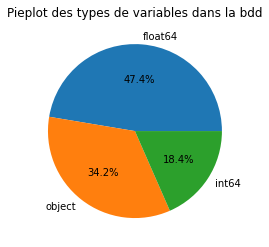

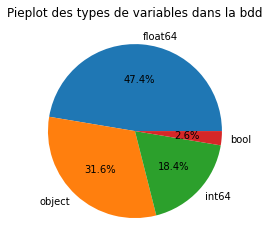

In [19]:
pie_types_variable(df1_)
pie_types_variable(df2_)

In [20]:
compare_type=pd.DataFrame()
compare_type['2015']=df1_.dtypes
compare_type['2016']=df2_.dtypes
compare_type.head()

,2015,2016
DataYear,int64,int64
BuildingType,object,object
PrimaryPropertyType,object,object
PropertyName,object,object
TaxParcelIdentificationNumber,object,object


In [21]:
compare_type[~(compare_type['2016']==compare_type['2015'])]

,2015,2016
NumberofBuildings,int64,float64
NumberofFloors,float64,int64
DefaultData,object,bool


In [22]:
idx=df2_[df2_.NumberofBuildings.isna()].index

In [23]:
df1_.drop(idx,inplace=True)
df2_.drop(idx,inplace=True)

In [24]:
df2_.NumberofBuildings=df2_.NumberofBuildings.astype('int64')

In [25]:
idx=df1_[df1_.NumberofFloors.isna()].index

In [26]:
df1_.drop(idx,inplace=True)
df2_.drop(idx,inplace=True)

In [27]:
df1_.NumberofFloors=df1_.NumberofFloors.astype('int64')

In [28]:
df1_.drop(['DefaultData'],axis=1,inplace=True)
df2_.drop(['DefaultData'],axis=1,inplace=True)

In [29]:
compare_type=pd.DataFrame()
compare_type['2015']=df1_.dtypes
compare_type['2016']=df2_.dtypes
compare_type[~(compare_type['2016']==compare_type['2015'])]

,2015,2016


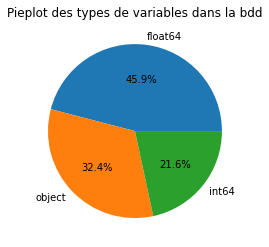

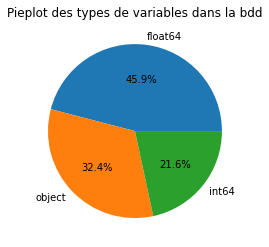

In [30]:
pie_types_variable(df1_)
pie_types_variable(df2_)

In [31]:
df1_.shape,df2_.shape

((1572, 37), (1572, 37))

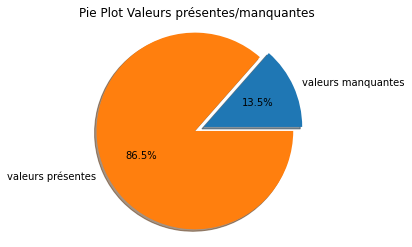

<Figure size 432x288 with 0 Axes>

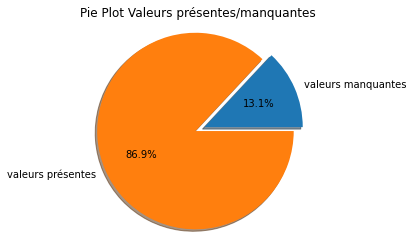

<Figure size 432x288 with 0 Axes>

In [32]:
pie_remplissage(df1_)
pie_remplissage(df2_)

In [33]:
df1_.isna().mean(),df2_.isna().mean()

(DataYear                           0.000000
 BuildingType                       0.000000
 PrimaryPropertyType                0.000000
 PropertyName                       0.000000
 TaxParcelIdentificationNumber      0.000000
 CouncilDistrictCode                0.000000
 Neighborhood                       0.000000
 YearBuilt                          0.000000
 NumberofBuildings                  0.000000
 NumberofFloors                     0.000000
 PropertyGFATotal                   0.000000
 PropertyGFAParking                 0.000000
 PropertyGFABuilding(s)             0.000000
 ListOfAllPropertyUseTypes          0.033079
 LargestPropertyUseType             0.035623
 LargestPropertyUseTypeGFA          0.035623
 SecondLargestPropertyUseType       0.503817
 SecondLargestPropertyUseTypeGFA    0.503817
 ThirdLargestPropertyUseType        0.793893
 ThirdLargestPropertyUseTypeGFA     0.793893
 YearsENERGYSTARCertified           0.944020
 ENERGYSTARScore                    0.322519
 SiteEUI(k

<AxesSubplot:>

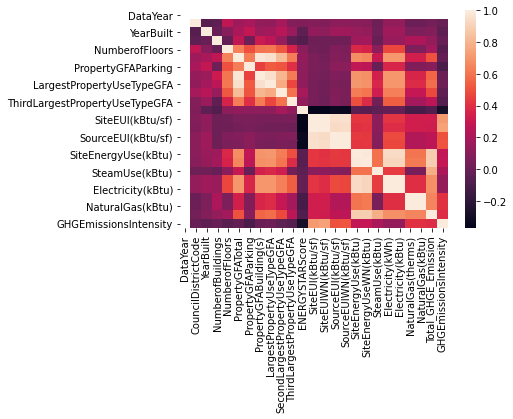

In [34]:
sns.heatmap(df1_.corr())

In [35]:
dfisna=pd.DataFrame()
dfisna['2015']=df1_.isna().mean()
dfisna['2016']=df2_.isna().mean()

In [36]:
dfisna[((dfisna==0).sum(axis=1)<2)].head()

,2015,2016
ListOfAllPropertyUseTypes,0.033079,0.000000
LargestPropertyUseType,0.035623,0.001908
LargestPropertyUseTypeGFA,0.035623,0.001908
SecondLargestPropertyUseType,0.503817,0.485369
SecondLargestPropertyUseTypeGFA,0.503817,0.485369


In [37]:
lst_drop=dfisna[((dfisna>0.4).sum(axis=1)==2)].index.values

In [38]:
df1_.drop(lst_drop,axis=1,inplace=True)
df2_.drop(lst_drop,axis=1,inplace=True)

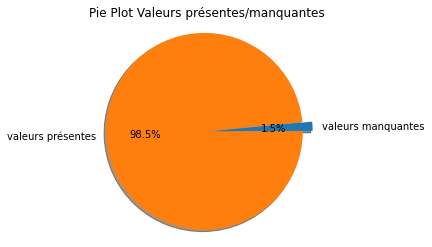

<Figure size 432x288 with 0 Axes>

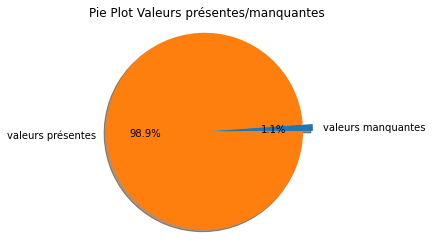

<Figure size 432x288 with 0 Axes>

(None, None)

In [39]:
pie_remplissage(df1_),pie_remplissage(df2_)

In [40]:
dfisna=pd.DataFrame()
dfisna['2015']=df1_.isna().mean()
dfisna['2016']=df2_.isna().mean()

In [41]:
df1_.dropna(inplace=True)
df2_.dropna(inplace=True)

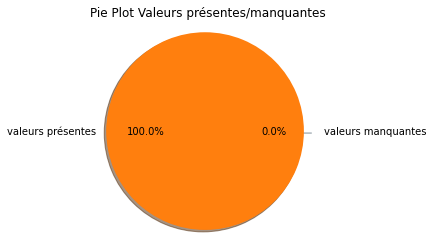

<Figure size 432x288 with 0 Axes>

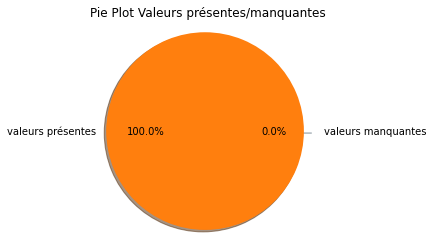

<Figure size 432x288 with 0 Axes>

(None, None)

In [42]:
pie_remplissage(df1_),pie_remplissage(df2_)

In [43]:
df1_.columns==df2_.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False])

In [44]:
df1_.columns

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'Total_GHGE_Emission', 'GHGEmissionsIntensity',
       'ComplianceStatus'],
      dtype='object')

In [45]:
df2_.columns

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'ComplianceStatus', 'Total_GHGE_Emission',
       'GHGEmissionsIntensity'],
      dtype='object')

In [46]:
df1_.drop(['ComplianceStatus'],axis=1,inplace=True)
df2_.drop(['ComplianceStatus'],axis=1,inplace=True)

In [47]:
df1_.columns==df2_.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [48]:
lst_drop=['PropertyName','TaxParcelIdentificationNumber','BuildingType']

In [49]:
df1_.drop(lst_drop,axis=1,inplace=True)
df2_.drop(lst_drop,axis=1,inplace=True)

In [50]:
lst_drop=['Electricity(kWh)','NaturalGas(therms)','SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)']

In [51]:
df1_.drop(lst_drop,axis=1,inplace=True)
df2_.drop(lst_drop,axis=1,inplace=True)

In [52]:
df1_.columns

Index(['DataYear', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'Total_GHGE_Emission',
       'GHGEmissionsIntensity'],
      dtype='object')

In [53]:
# On fait un dict afin de pouvoir renommer toutes les catégories en les rassemblant par utilité plus générale. 
rename={'K-12 School':'Enseignement',
        'College/University':'Enseignement',
        'Other - Education':'Enseignement',
        'Adult Education':'Enseignement',
        'Pre-school/Daycare':'Enseignement',
        'University':'Enseignement',
        
        
        
        'Senior Care Community':'servicepublic',
        'Hospital':'servicepublic',
        'Medical Office':'servicepublic',
        'Hospital (General Medical & Surgical)':'servicepublic',
        'Other/Specialty Hospital':'servicepublic',
        'Laboratory':'servicepublic',
        'Urgent Care/Clinic/Other Outpatient':'servicepublic',
        
        
        
        
        
        
        
        
        'Small- and Mid-Sized Office':'bureau',
        'Large Office':'bureau',
        'Medical Office':'bureau',
        'Office':'bureau',
        'Financial Office':'bureau',
        'Data Center':'bureau',
        'Manufacturing/Industrial Plant':'bureau',
        
        
        
        
        
        
        
        
        'Worship Facility':'entertainment',
        'Restaurant\n':'entertainment',
        'Other - Entertainment/Public Assembly':'entertainment',
        'Social/Meeting Hall':'entertainment',
        'Other - Recreation':'entertainment',
        'Museum':'entertainment',
        'Wholesale Club/Supercenter':'entertainment',
        'Lifestyle Center':'entertainment',
        'Restaurant':'entertainment',
        'Restaurant\n':'entertainment',
        'Other - Restaurant/Bar':'entertainment',
        'Food Service':'entertainment',
        'Performing Arts':'entertainment',
        'Personal Services (Health/Beauty, Dry Cleaning, etc)':'entertainment',
        'Movie Theater':'entertainment',
        
        
        
        
        
        
        
        
        
        'Hotel':'Logement-hotel',
        'Residence Hall/Dormitory':'Logement-hotel',
        'Low-Rise Multifamily':'Logement-hotel',
        'Other - Lodging/Residential':'Logement-hotel',
        'Residence Hall/Dormit':'Logement-hotel',
        'Residential Care Facility':'Logement-hotel',
        'Multifamily Housing':'Logement-hotel',
        
        
        
        
        
        
        'Police Station':'servicepublic',
        'Courthouse':'servicepublic',
        'Other - Services':'servicepublic',
        'Other - Public Services':'servicepublic',
        'Bank Branch':'servicepublic',
        'Fire Station':'servicepublic',
        
        
        
        
        
        
        
        'Non-Refrigerated Warehouse':'commerce',
        'Self-Storage Facility\n':'commerce',
        'Self-Storage Facility':'commerce',
        'Distribution Center\n':'commerce',
        'Distribution Center':'commerce',
        'Refrigerated Warehouse':'commerce',
        'Warehouse':'commerce',
        'Retail Store':'commerce',
        'Supermarket/Grocery Store':'commerce',
        'Supermarket / Grocery Store':'commerce',
        'Library':'commerce',
        'Fitness Center/Health Club/Gym':'commerce',
        'Automobile Dealership':'commerce',
        'Repair Services (Vehicle, Shoe, Locksmith, etc)':'commerce',
        'Strip Mall':'commerce',
        'Other - Mall':'commerce',
        
        
        
        
        
        
        
        
        
        
        'Other':'Autre',
        'Mixed Use Property':'Autre',
        'Parking':'servicepublic',    
        'Other - Utility':'Autre',

        
       }


In [54]:
df1_.drop('PrimaryPropertyType',axis=1,inplace=True)
df2_.drop('PrimaryPropertyType',axis=1,inplace=True)
df1_.drop('ListOfAllPropertyUseTypes',axis=1,inplace=True)
df2_.drop('ListOfAllPropertyUseTypes',axis=1,inplace=True)

In [55]:
df1_.LargestPropertyUseType.replace(rename,inplace=True)
df2_.LargestPropertyUseType.replace(rename,inplace=True)

In [56]:
df1_.columns

Index(['DataYear', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'Total_GHGE_Emission', 'GHGEmissionsIntensity'],
      dtype='object')

In [57]:
df1_.groupby('CouncilDistrictCode').describe()[['Total_GHGE_Emission','SiteEnergyUse(kBtu)']]

Total_GHGE_Emission                                 \
                                  count        mean          std   min   
CouncilDistrictCode                                                      
1                                  78.0   91.341282   217.506276  2.01   
2                                 236.0   67.206441   105.927455  0.66   
3                                 111.0  399.925586  1586.184983  0.89   
4                                 104.0  161.028077   797.658155  1.15   
5                                  86.0  140.768140   345.222619  1.61   
6                                  77.0  102.953506   225.325586  1.24   
7                                 328.0  188.129177   344.252694  3.02   

                                                         SiteEnergyUse(kBtu)  \
                         25%     50%       75%       max               count   
CouncilDistrictCode                                                            
1                    21.3125  42.075   81.2475   1858.84                78.0   
2                    13.5650  31.080   72.3900    953.12               236.0   
3                    26.7400  69.670  175.7700  11824.89               111.0   
4                    15.7025  42.350   83.2775   8046.70               104.0   
5                    19.2025  50.535  150.6675   3044.63                86.0   
6                    23.0300  41.060   97.9700   1874.42                77.0   
7                    29.9100  70.545  208.1375   2937.83               328.0   

                                                                       \
                             mean           std       min         25%   
CouncilDistrictCode                                                     
1                    3.424867e+06  5.675054e+06  288191.0  1085311.50   
2                    3.581217e+06  6.346452e+06   94186.0  1024758.25   
3                    1.367163e+07  4.194410e+07   82824.0  1544316.00   
4                    6.242380e+06  2.490607e+07  165472.0  1101295.75   
5                    5.627686e+06  1.086048e+07  145573.0  1164895.50   
6                    4.537524e+06  7.915409e+06  178243.0  1189432.00   
7                    1.143998e+07  2.102759e+07  433443.0  2006163.75   

                                                          
                           50%          75%          max  
CouncilDistrictCode                                       
1                    1914288.5   3117081.00   45494324.0  
2                    1874277.0   3696154.25   78272488.0  
3                    2658826.0   8621161.00  295812640.0  
4                    2032873.0   4796113.75  251191824.0  
5                    2203067.0   6792741.25   94178648.0  
6                    2004995.0   4770943.00   63362516.0  
7                    5094340.0  12792129.75  284867168.0

In [58]:
lst_drop=['CouncilDistrictCode','Neighborhood']

On part sur l'idée que la position des bâtiments n'influent pas sur sa consommation

In [59]:
df1_.drop(lst_drop,axis=1,inplace=True)
df2_.drop(lst_drop,axis=1,inplace=True)

In [60]:
df1_.LargestPropertyUseType

OSEBuildingID
1        Logement-hotel
2        Logement-hotel
3        Logement-hotel
8        Logement-hotel
10       Logement-hotel
              ...      
20440            bureau
24538          commerce
24539          commerce
24560      Enseignement
24563          commerce
Name: LargestPropertyUseType, Length: 1020, dtype: object

In [61]:
df2_.shape

(1038, 18)

In [62]:
idxd1=df1_.index.values
idxd2=df2_.index.values

In [63]:
d15_16=list(set(idxd1)-set(idxd2))
d16_15=list(set(idxd2)-set(idxd1))
idcom=list(set(idxd1)-set(d15_16))
idext=d15_16+d16_15

In [64]:
len(idcom),len(idext)

(983, 92)

In [65]:
df1_=df1_.loc[idcom]

In [66]:
df2_=df2_.loc[idcom]

In [67]:
desc_df(df1_),desc_df(df2_)

Dans la base de données  on a 983 lignes avec 18 variables. Elle est remplie à 100.0 % et il y a 0 lignes dupliquées
Dans la base de données  on a 983 lignes avec 18 variables. Elle est remplie à 100.0 % et il y a 0 lignes dupliquées


(None, None)

In [68]:
(df1_.LargestPropertyUseType==df2_.LargestPropertyUseType).mean()

0.9979654120040692

In [69]:
df1_[~(df1_.LargestPropertyUseType==df2_.LargestPropertyUseType)]

,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Total_GHGE_Emission,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,
371,2015,2000,1,11,381381,195621,185760,bureau,164192.0,85.0,48.5,151.1,9796649.0,0.0,9680526.0,116524.0,73.67,0.08
796,2015,1975,1,5,238148,0,238148,commerce,238148.0,27.0,47.7,149.7,11356990.0,0.0,11357464.0,0.0,79.17,0.13


In [70]:
df2_[~(df1_.LargestPropertyUseType==df2_.LargestPropertyUseType)]

,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Total_GHGE_Emission,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,
371,2016,2000,1,11,381381,195621,185760,servicepublic,182820.0,94.0,48.400002,150.899994,9765777.0,0.0,9671822.0,93954.0,72.42,0.19
796,2016,1975,1,5,238148,0,238148,bureau,245240.0,93.0,43.900002,138.000000,10775646.0,0.0,10775645.0,0.0,75.12,0.32


In [71]:
df1_['age']=df1_.DataYear-df1_.YearBuilt
df2_['age']=df2_.DataYear-df2_.YearBuilt


In [72]:
df1_.drop(['DataYear', 'YearBuilt'],axis=1,inplace=True)
df2_.drop(['DataYear', 'YearBuilt'],axis=1,inplace=True)

In [73]:
df1_.columns

Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'Total_GHGE_Emission', 'GHGEmissionsIntensity',
       'age'],
      dtype='object')

In [74]:
lst_colquant=(df1_.loc[:,(df1_.dtypes=='int64')|(df1_.dtypes=='float64')].columns.tolist())

In [75]:
lst_colquant

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'Total_GHGE_Emission',
 'GHGEmissionsIntensity',
 'age']

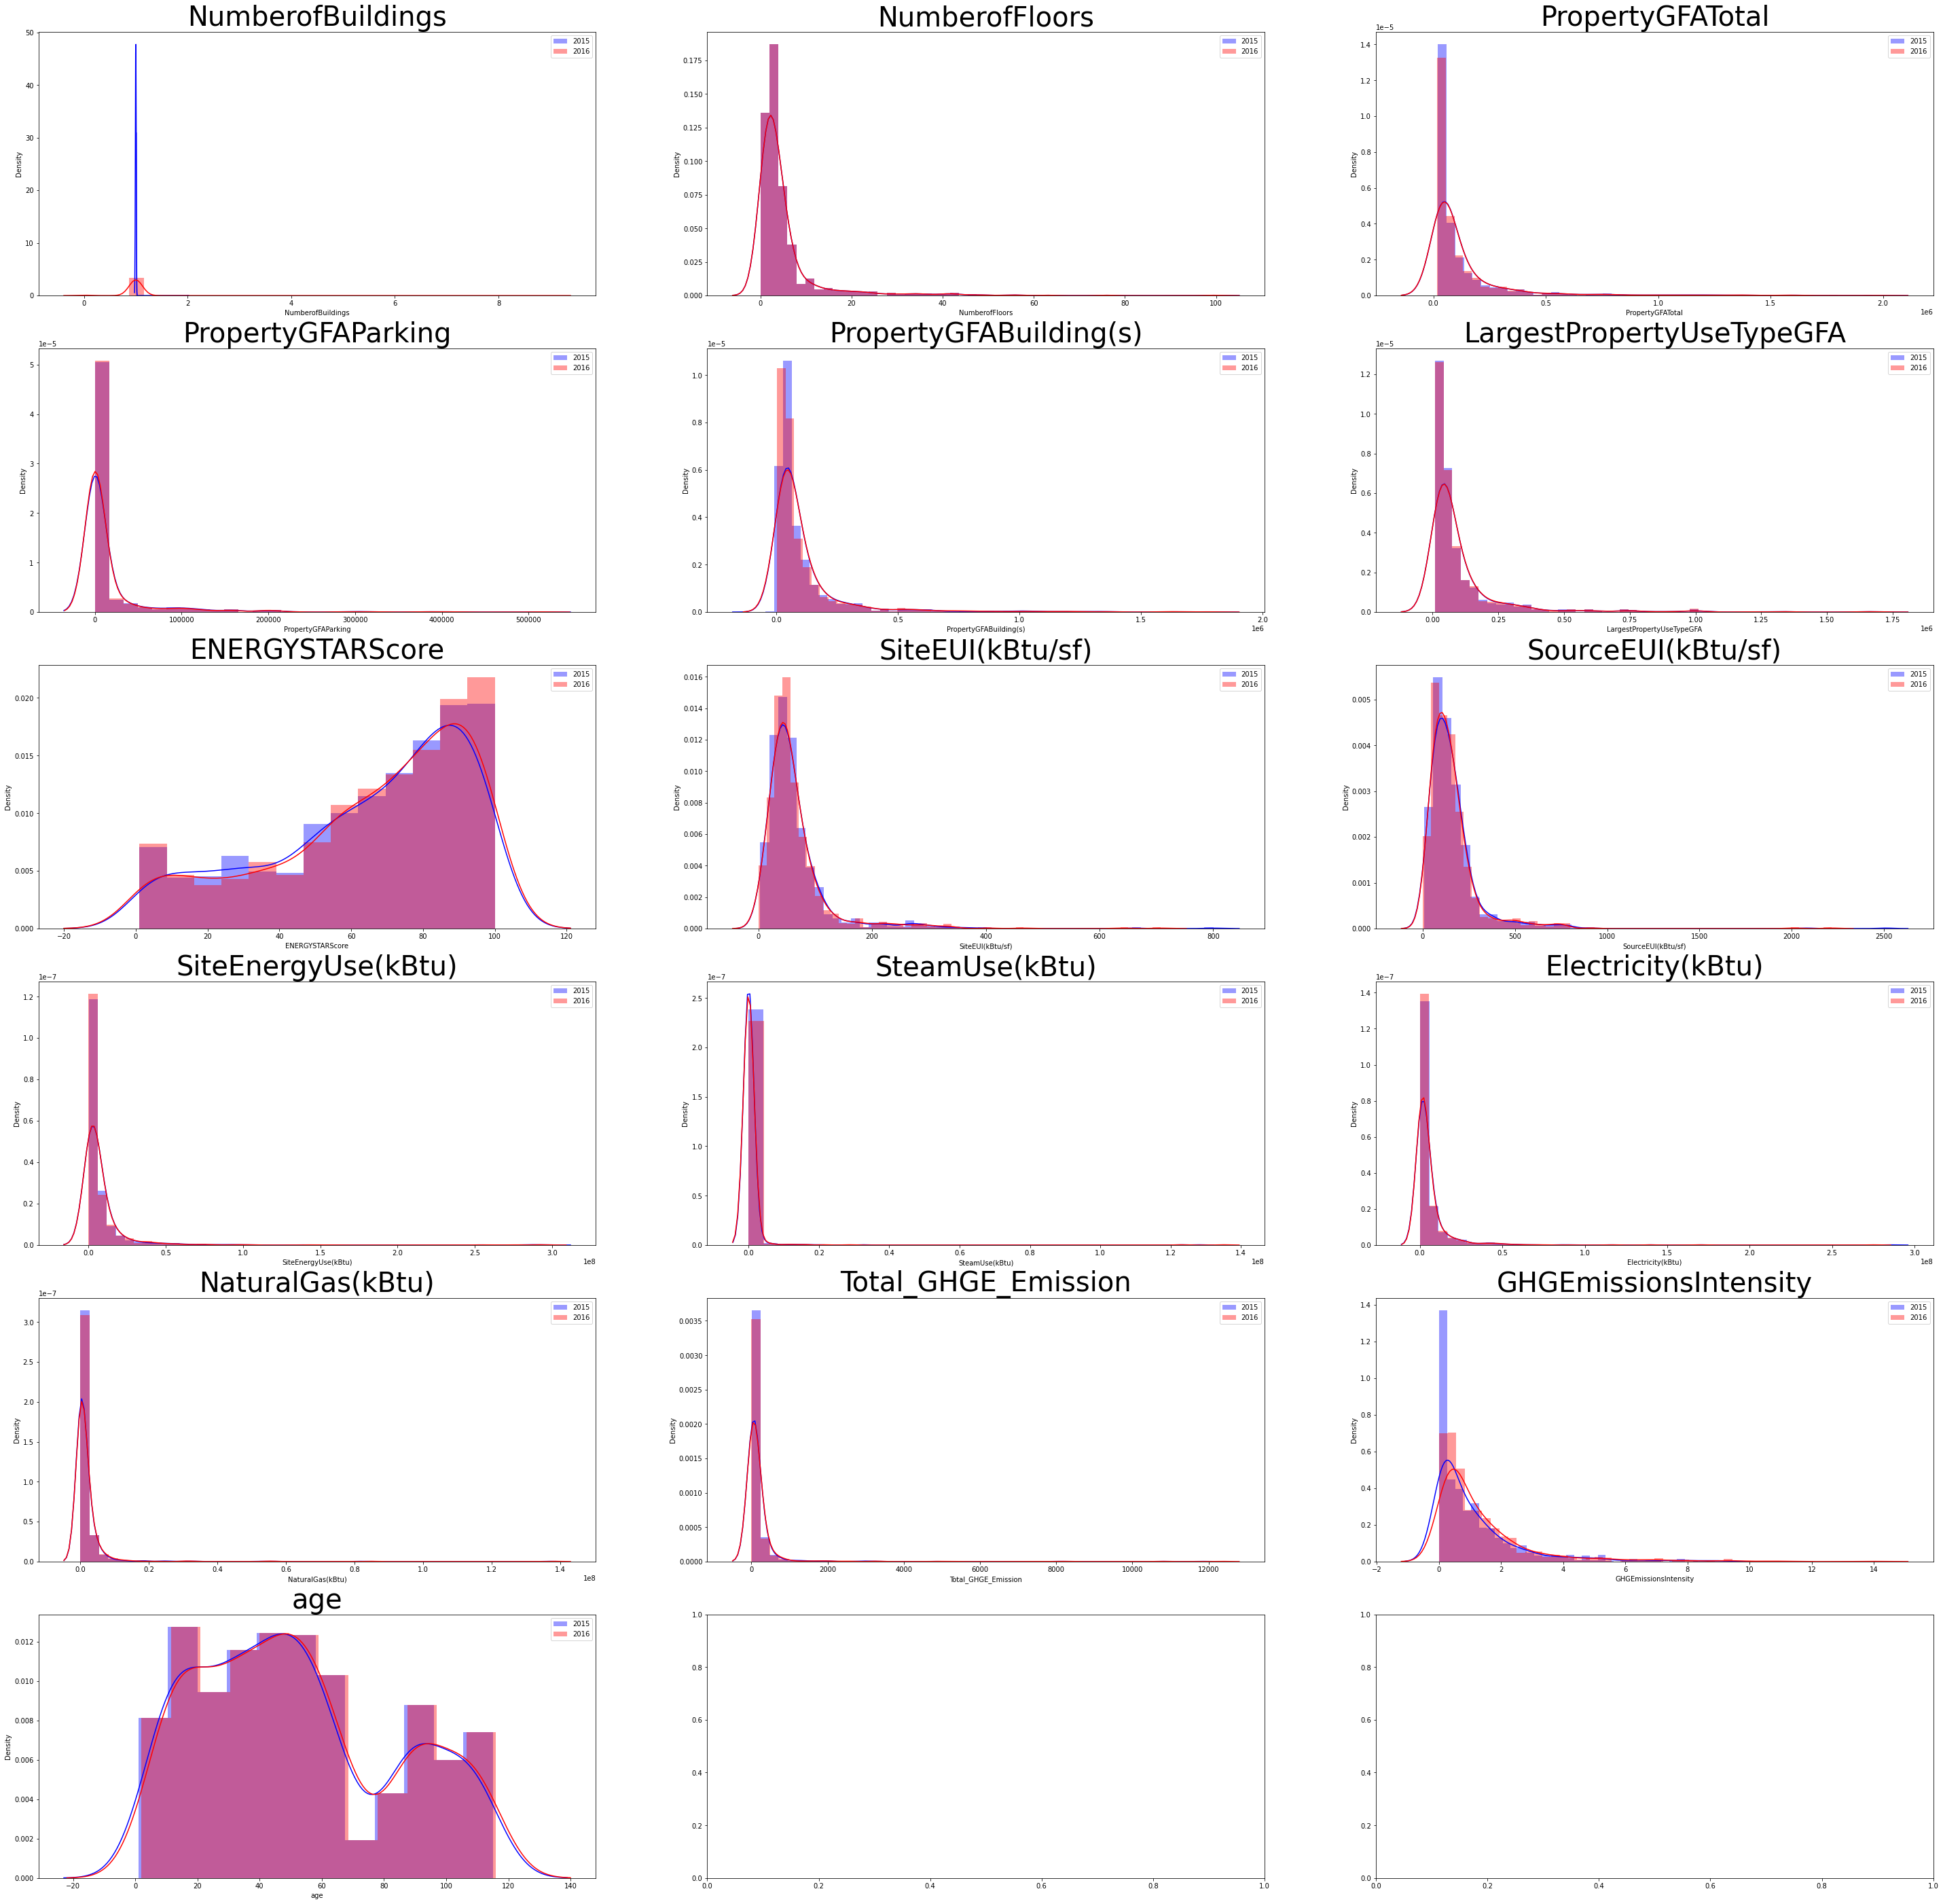

In [76]:
n_rows = 6
n_cols = 3
f, axes = plt.subplots(n_rows, n_cols, figsize=(50, 50))

ax_list = []
for row_idx in range(n_rows):
    for col_idx in range(n_cols):
        ax_list.append(axes[row_idx,col_idx])

pointer = 0
for col in lst_colquant:
    sns.distplot(df1_[col], color="b",ax=ax_list[pointer],label='2015')
    sns.distplot(df2_[col], color="r",ax=ax_list[pointer],label='2016')
    ax_list[pointer].set_title(col,fontsize=40)
    ax_list[pointer].legend()
 
    pointer+=1

<AxesSubplot:xlabel='PropertyGFATotal', ylabel='Density'>

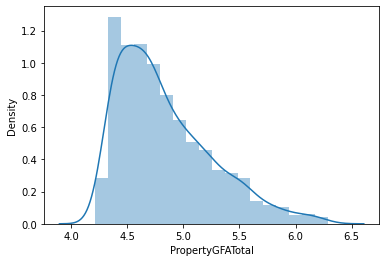

In [77]:
sns.distplot((np.log10(1+df2_.PropertyGFATotal)))

<AxesSubplot:xlabel='PropertyGFATotal', ylabel='Density'>

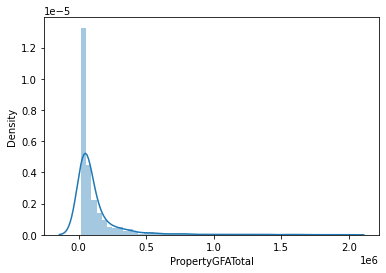

In [78]:
sns.distplot(df2_.PropertyGFATotal)

On voit que pour plusieurs variables il y a des valeurs 

In [79]:
df2_.ENERGYSTARScore.describe()

count    983.000000
mean      65.381485
std       27.829748
min        1.000000
25%       49.000000
50%       72.000000
75%       88.000000
max      100.000000
Name: ENERGYSTARScore, dtype: float64

In [80]:
lst_col=df1_.describe().columns.values

In [81]:
for col in lst_col:
    df1_[col] = df1_[col].apply(lambda x : x if x >= 0 else (-x))
    df1_[col] = df1_[col].apply(lambda x : x if x >= 0 else -x)

In [91]:
df1_.shape,df2_.shape

((983, 17), (983, 17))

In [92]:
df1_.drop('GHGEmissionsIntensity',axis=1,inplace=True)
df2_.drop('GHGEmissionsIntensity',axis=1,inplace=True)

In [93]:
col=df1_.describe().columns

In [94]:
df12=pd.DataFrame()

In [95]:
df12[col]=(df1_[col]+df2_[col])/2

In [97]:
df12.describe()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Total_GHGE_Emission,age
count,983.000000,983.000000,9.830000e+02,983.000000,9.830000e+02,9.830000e+02,983.000000,983.000000,983.000000,9.830000e+02,9.830000e+02,9.830000e+02,9.830000e+02,983.000000,983.000000
mean,1.013733,4.901322,1.255765e+05,15136.766531,1.104838e+05,1.032311e+05,64.893184,63.269990,157.977518,7.821507e+06,4.862147e+05,5.644999e+06,1.678758e+06,166.041353,52.046287
std,0.257405,8.053881,2.098125e+05,45771.299200,1.816404e+05,1.677283e+05,27.250092,59.329199,154.229255,2.115540e+07,5.943398e+06,1.473364e+07,6.273892e+06,649.892193,31.700412
min,0.500000,0.000000,2.000000e+04,0.000000,1.620000e+04,8.061000e+03,1.000000,3.250000,6.350000,8.126790e+04,0.000000e+00,8.359000e+03,0.000000e+00,0.880000,1.500000
25%,1.000000,1.000000,3.230300e+04,0.000000,3.132150e+04,2.898550e+04,47.500000,33.000000,77.924999,1.292866e+06,0.000000e+00,7.794068e+05,0.000000e+00,20.415000,26.500000
50%,1.000000,3.000000,5.325000e+04,0.000000,5.090700e+04,4.939500e+04,71.500000,49.700000,127.149999,2.559644e+06,0.000000e+00,1.736237e+06,4.837245e+05,49.895000,47.500000
75%,1.000000,5.000000,1.223780e+05,0.000000,1.062220e+05,1.014555e+05,87.500000,72.025001,185.050002,7.040798e+06,0.000000e+00,5.118156e+06,1.385129e+06,131.255000,77.500000
max,5.000000,99.000000,1.952220e+06,512608.000000,1.765970e+06,1.680937e+06,100.000000,753.949994,2364.450024,2.944517e+08,1.314066e+08,2.796294e+08,1.373198e+08,12066.025000,115.500000


In [98]:
from pandas.plotting import scatter_matrix


In [103]:
df12.shape,df1_.shape

((983, 15), (983, 16))

In [104]:
df12.columns

Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'Total_GHGE_Emission', 'age'],
      dtype='object')

In [108]:
col=['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'age']

Text(0.5, 1.0, 'age')

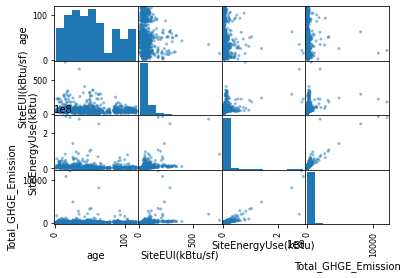

In [119]:

scatter_matrix(df12[[k,'SiteEUI(kBtu/sf)','SiteEnergyUse(kBtu)',
      'Total_GHGE_Emission']],figsize=(8,8))


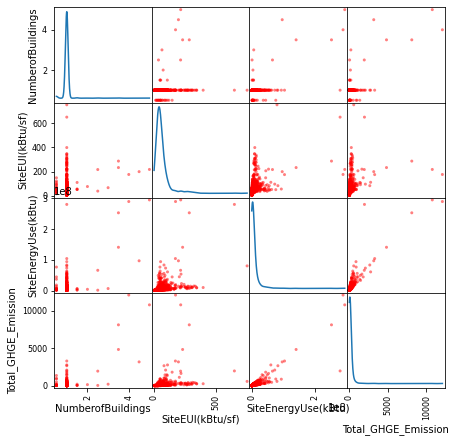

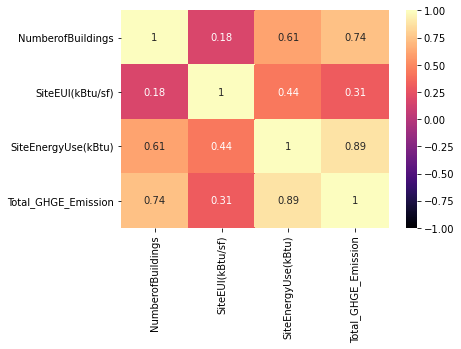

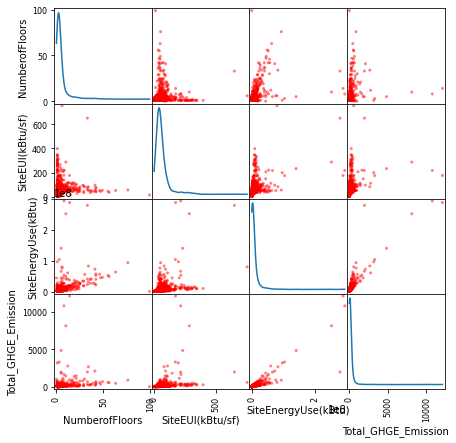

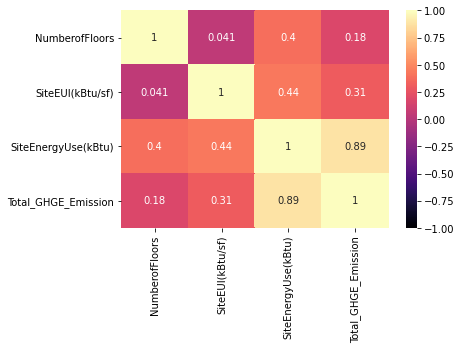

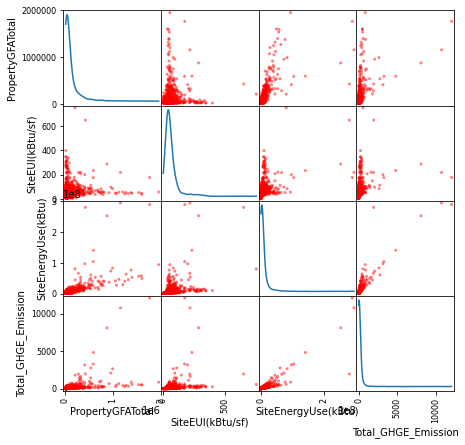

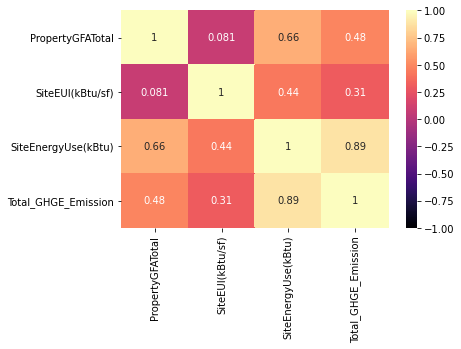

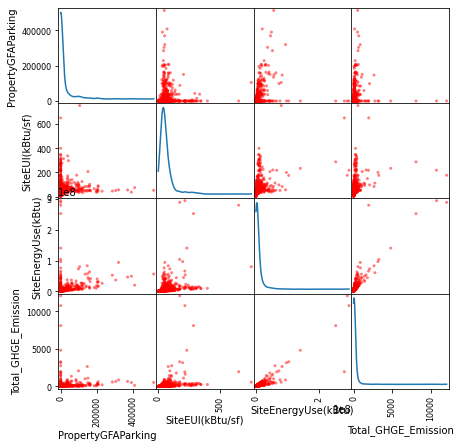

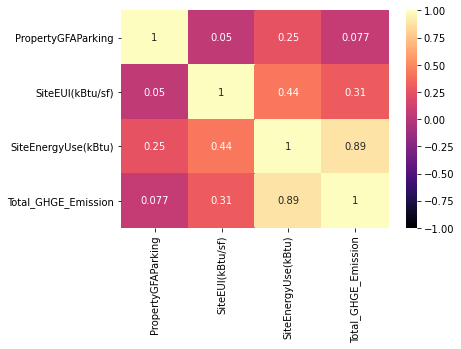

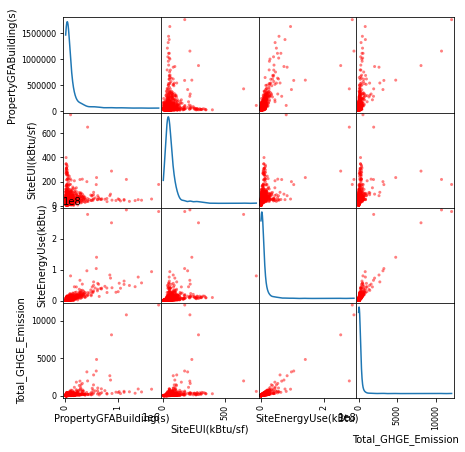

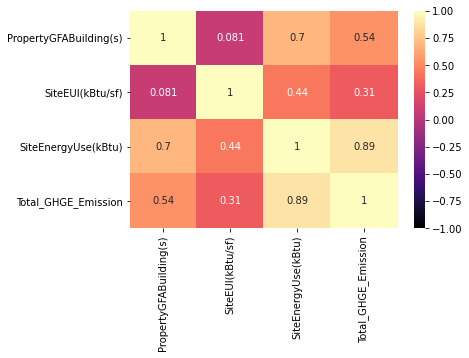

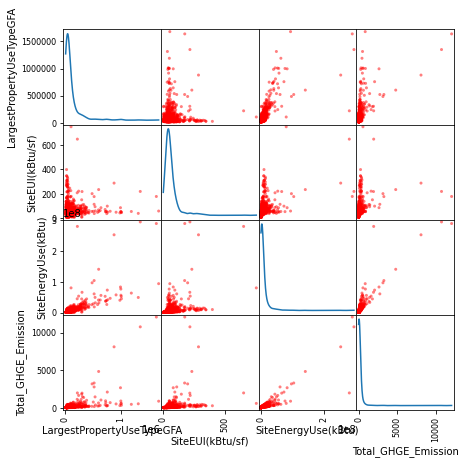

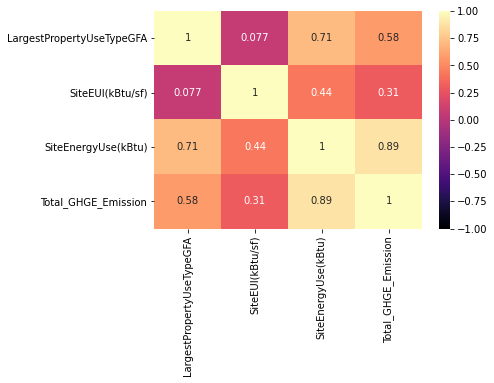

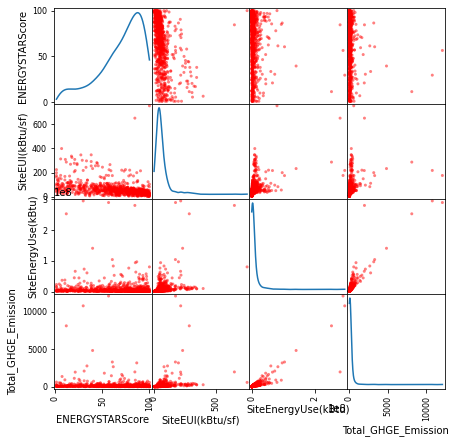

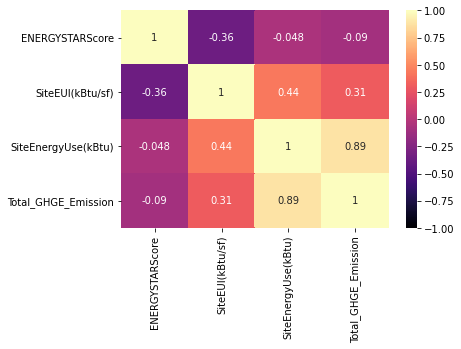

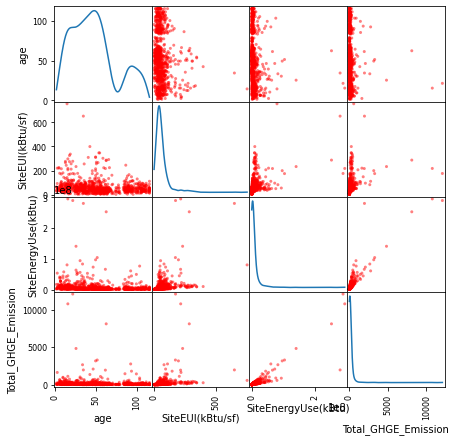

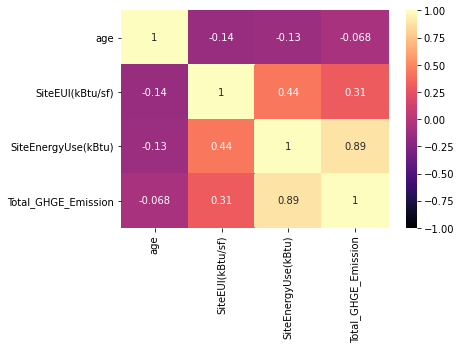

In [128]:
n_rows = 1
n_cols = 2

for k in col:

    scatter_matrix(df12[[k,'SiteEUI(kBtu/sf)','SiteEnergyUse(kBtu)',
      'Total_GHGE_Emission']],figsize=(7,7),diagonal='kde',color='red')
    plt.show()
    sns.heatmap(df12[[k,'SiteEUI(kBtu/sf)','SiteEnergyUse(kBtu)',
      'Total_GHGE_Emission']].corr(),annot=df12[[k,'SiteEUI(kBtu/sf)','SiteEnergyUse(kBtu)',
      'Total_GHGE_Emission']].corr(),vmin=-1, vmax=1,cmap='magma')
    plt.show()

In [129]:
col2=['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA']

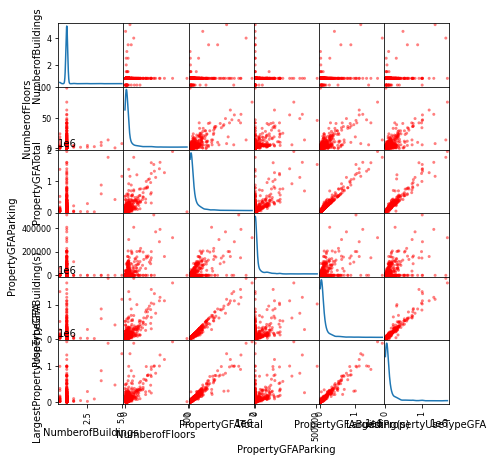

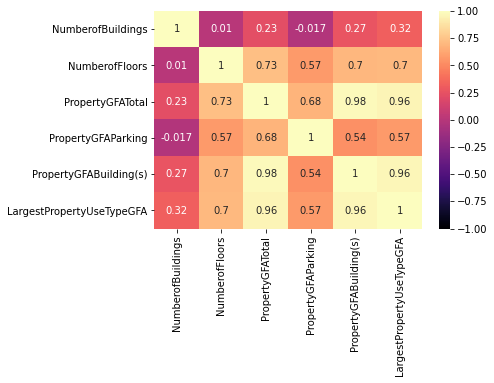

In [131]:


scatter_matrix(df12[col2],figsize=(7,7),diagonal='kde',color='red')
plt.show()
sns.heatmap(df12[col2].corr(),annot=df12[col2].corr(),vmin=-1, vmax=1,cmap='magma')
plt.show()

In [132]:
df12.columns

Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'Total_GHGE_Emission', 'age'],
      dtype='object')

In [133]:
df12['LargestPropertyUseType']=df2_.LargestPropertyUseType

Choix de ne pas prendre PropertyGFABuildings et PropertyGFATotal car très corrélés avec le reste des variables et donc pour les surface ont peut garder le nombre d'étage et nombre de bâtiment

In [134]:
df12['NRJuselog']=np.log10(1+df12['SiteEnergyUse(kBtu)'])
df12['GHGEemissionlog']=np.log10(1+df12.Total_GHGE_Emission)
df12['LargPropertGFAlog']=np.log10(1+df12.LargestPropertyUseTypeGFA)

In [135]:
df12.drop(['PropertyGFABuilding(s)','PropertyGFATotal',
           'SiteEUI(kBtu/sf)',
           'SourceEUI(kBtu/sf)','Total_GHGE_Emission'],axis=1,inplace=True)

In [136]:
df12.columns

Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'age',
       'LargestPropertyUseType', 'NRJuselog', 'GHGEemissionlog',
       'LargPropertGFAlog'],
      dtype='object')

In [137]:
df12['SteamPourcent']=df12['SteamUse(kBtu)']/df12['SiteEnergyUse(kBtu)']
df12['NatGazPourcent']=df12['NaturalGas(kBtu)']/df12['SiteEnergyUse(kBtu)']
df12['ElecPourcent']=df12['Electricity(kBtu)']/df12['SiteEnergyUse(kBtu)']

In [139]:
df12.drop(['SteamUse(kBtu)','SiteEnergyUse(kBtu)',
           'NaturalGas(kBtu)',
           'Electricity(kBtu)'],axis=1,inplace=True)

In [141]:
df12.describe()

,NumberofBuildings,NumberofFloors,PropertyGFAParking,LargestPropertyUseTypeGFA,ENERGYSTARScore,age,NRJuselog,GHGEemissionlog,LargPropertGFAlog,SteamPourcent,NatGazPourcent,ElecPourcent
count,983.000000,983.000000,983.000000,9.830000e+02,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,1.013733,4.901322,15136.766531,1.032311e+05,64.893184,52.046287,6.487320,1.729910,4.772480,0.019514,0.267025,0.713006
std,0.257405,8.053881,45771.299200,1.677283e+05,27.250092,31.700412,0.539284,0.593383,0.402836,0.086240,0.262191,0.261149
min,0.500000,0.000000,0.000000,8.061000e+03,1.000000,1.500000,4.909924,0.274158,3.906443,0.000000,0.000000,0.004945
25%,1.000000,1.000000,0.000000,2.898550e+04,47.500000,26.500000,6.111549,1.330717,4.462196,0.000000,0.000000,0.513608
50%,1.000000,3.000000,0.000000,4.939500e+04,71.500000,47.500000,6.408180,1.706675,4.693692,0.000000,0.223832,0.729205
75%,1.000000,5.000000,0.000000,1.014555e+05,87.500000,77.500000,6.847622,2.121407,5.006279,0.000000,0.472446,1.000016
max,5.000000,99.000000,512608.000000,1.680937e+06,100.000000,115.500000,8.469014,4.081600,6.225552,0.693219,0.995055,1.000032


In [146]:
df12.head()

,NumberofBuildings,NumberofFloors,ENERGYSTARScore,age,LargestPropertyUseType,NRJuselog,GHGEemissionlog,LargPropertGFAlog,SteamPourcent,NatGazPourcent,ElecPourcent,PropertyGFAParkinglog
OSEBuildingID,,,,,,,,,,,,
1,1.0,12.0,62.5,88.5,Logement-hotel,6.851497,2.399163,4.946624,0.283430,0.179397,0.537183,0.000000
2,1.0,11.0,56.0,19.5,Logement-hotel,6.922782,2.448219,4.923664,0.000000,0.573048,0.426962,4.177969
3,1.0,41.0,30.5,46.5,Logement-hotel,7.862482,3.317307,5.879021,0.282924,0.035711,0.681380,4.992819
8,1.0,18.0,71.0,35.5,Logement-hotel,7.161394,2.705312,5.091477,0.000000,0.605727,0.394282,4.570905
10,1.0,11.0,26.0,89.5,Logement-hotel,6.778572,2.286232,4.910374,0.000000,0.542876,0.457133,0.000000


In [142]:
df12['PropertyGFAParkinglog']=np.log10(1+df12.PropertyGFAParking)

In [143]:
df12.drop(['PropertyGFAParking',
           'LargestPropertyUseTypeGFA'],axis=1,inplace=True)

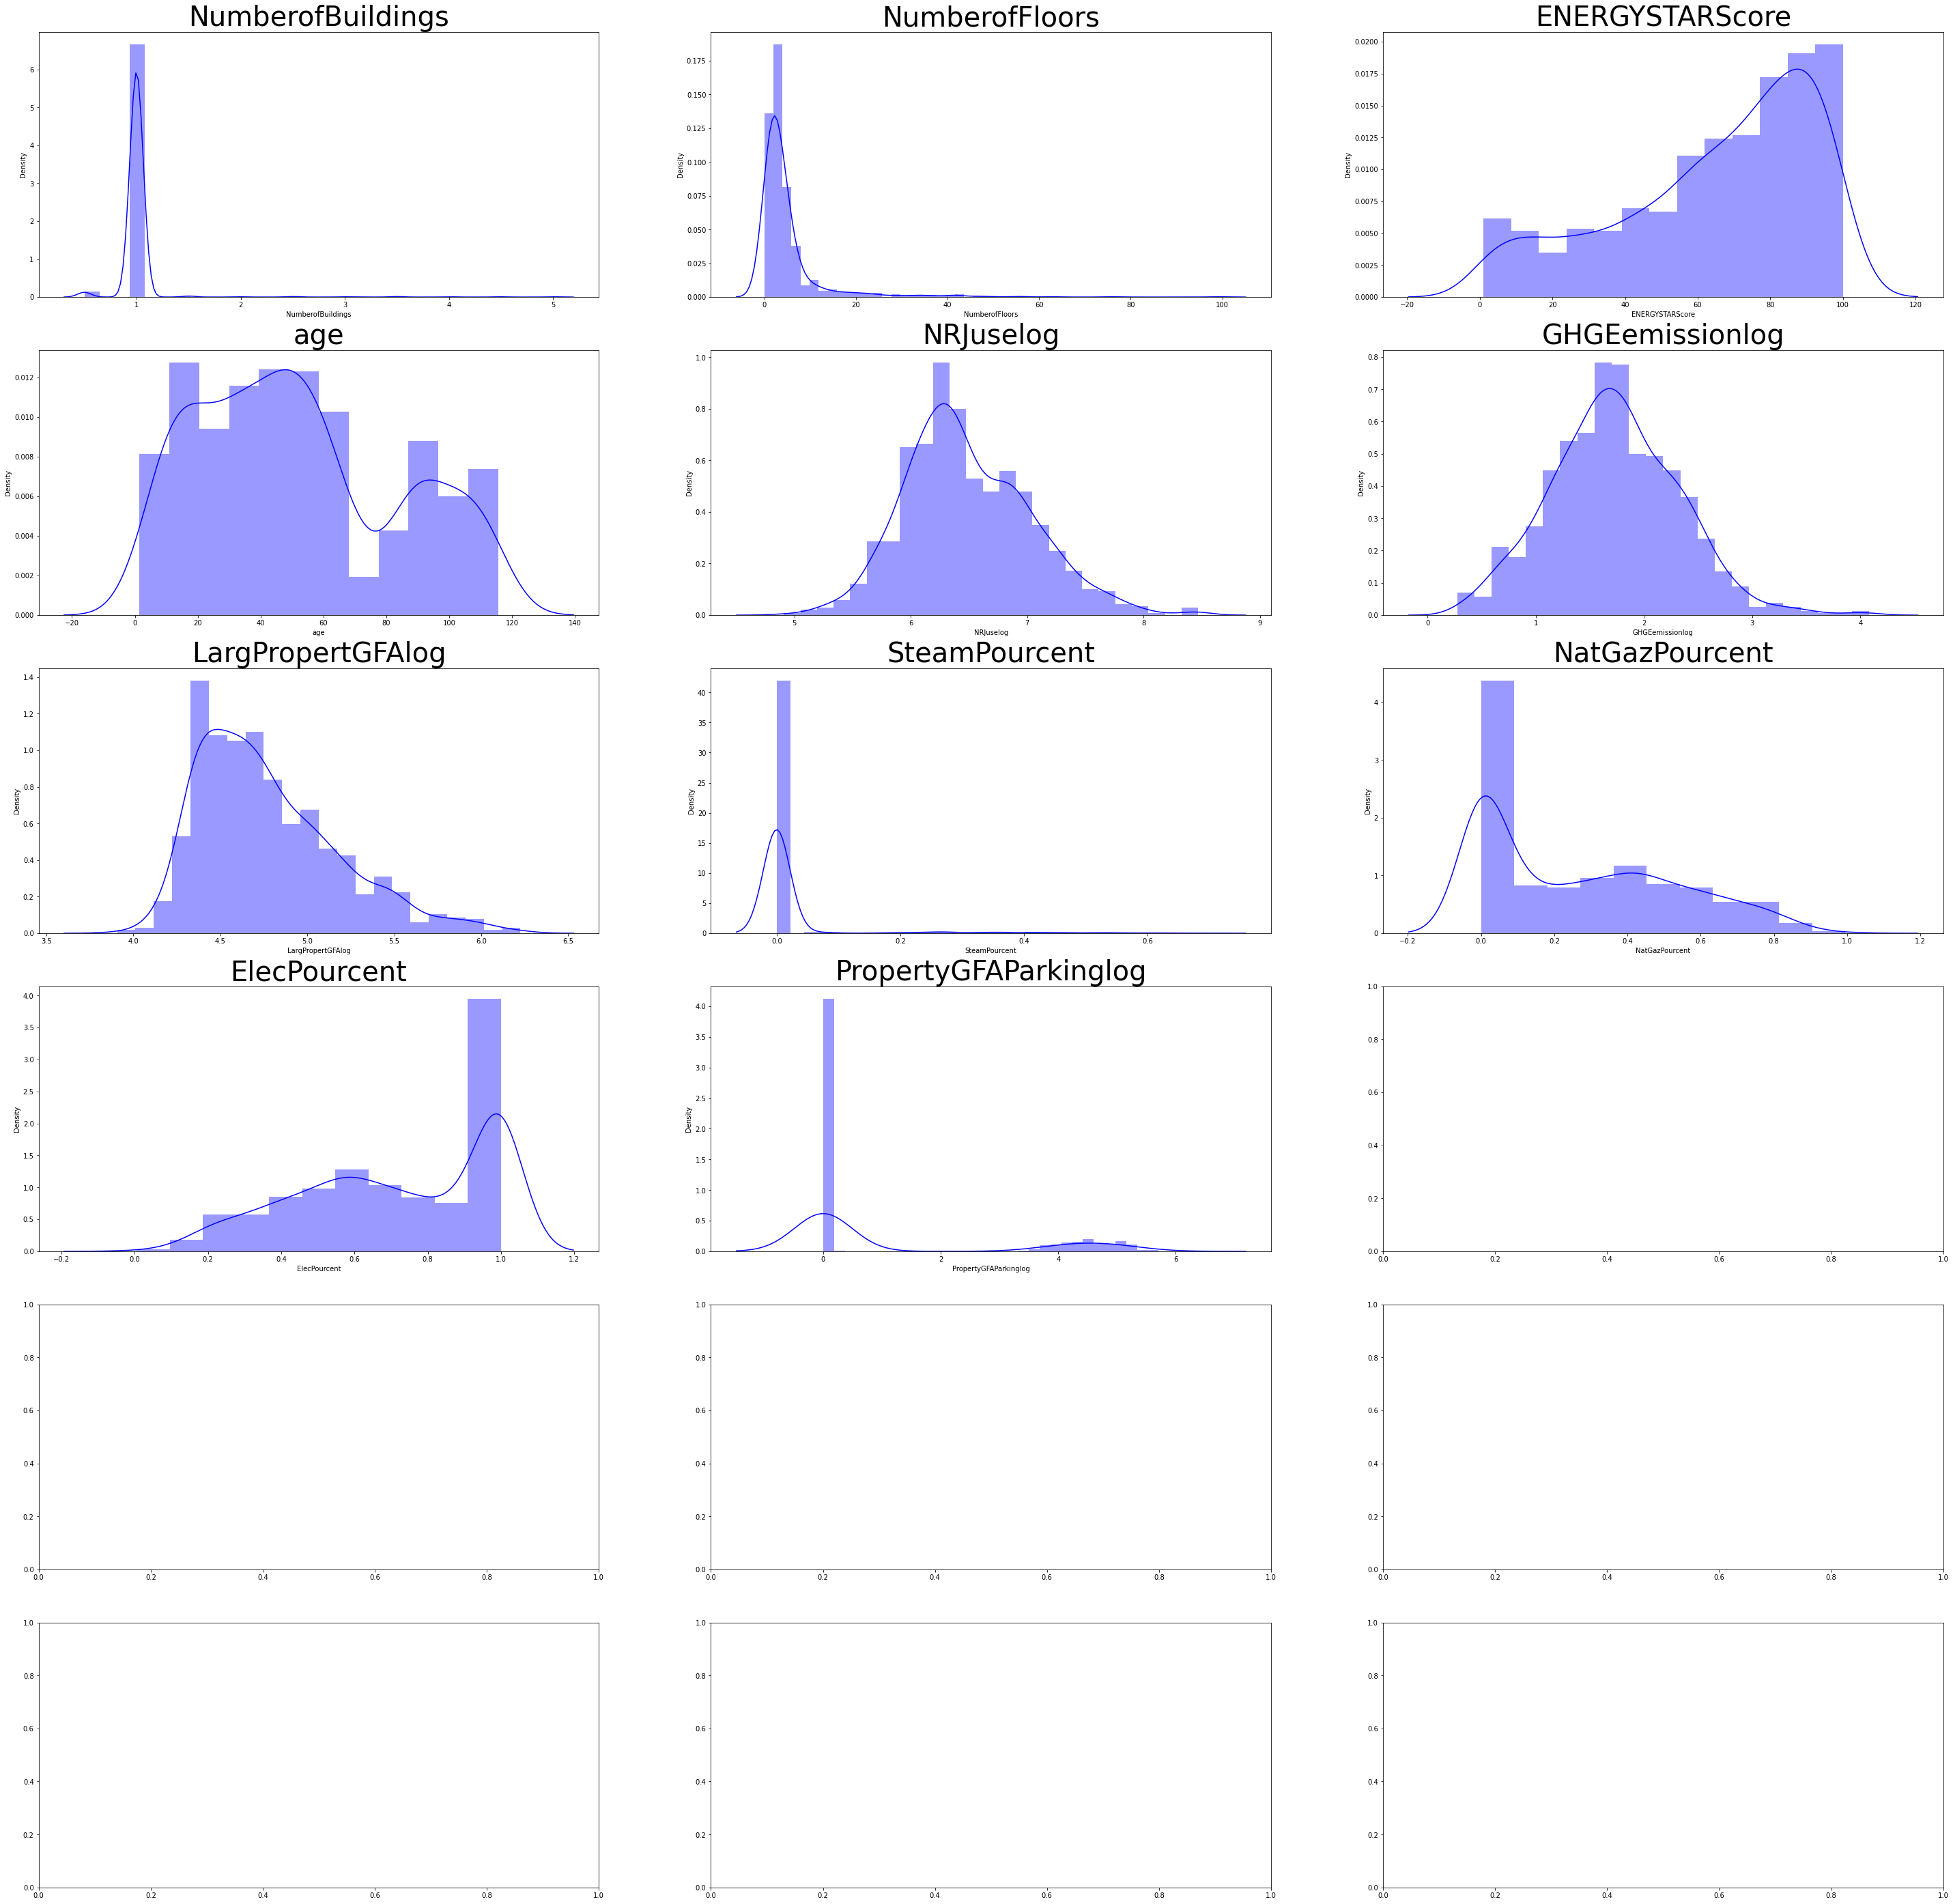

In [147]:
n_rows = 6
n_cols = 3
f, axes = plt.subplots(n_rows, n_cols, figsize=(50, 50))

ax_list = []
for row_idx in range(n_rows):
    for col_idx in range(n_cols):
        ax_list.append(axes[row_idx,col_idx])

pointer = 0
for col in df12.describe().columns:
    sns.distplot(df12[col], color="b",ax=ax_list[pointer])
    ax_list[pointer].set_title(col,fontsize=40)
 
    pointer+=1

In [166]:
df12.ElecPourcent=pd.cut((100*df12.ElecPourcent).astype('int64'),2).cat.codes
df12.SteamPourcent=pd.cut((100*df12.SteamPourcent).astype('int64'),2).cat.codes
df12.NatGazPourcent=pd.cut((100*df12.NatGazPourcent).astype('int64'),2).cat.codes

In [167]:
df12.columns

Index(['NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore', 'age',
       'LargestPropertyUseType', 'NRJuselog', 'GHGEemissionlog',
       'LargPropertGFAlog', 'SteamPourcent', 'NatGazPourcent', 'ElecPourcent',
       'PropertyGFAParkinglog'],
      dtype='object')

In [168]:
df12.to_csv('dftr2.csv',header=True,index=False)

In [172]:
df12.SteamPourcent.value_counts(),
df12.ElecPourcent.value_counts(),
df12.NatGazPourcent.value_counts()

0    766
1    217
Name: NatGazPourcent, dtype: int64

In [179]:
df12.SteamPourcent.value_counts()

0    957
1     26
Name: SteamPourcent, dtype: int64

In [184]:
df12.SteamPourcent.value_counts()

0    957
1     26
Name: SteamPourcent, dtype: int64

## Partie 2 la modélisation:

In [173]:
df12[['NatGazPourcent','ElecPourcent','SteamPourcent']].corr()

,NatGazPourcent,ElecPourcent,SteamPourcent
NatGazPourcent,1.000000,-0.926281,-0.087730
ElecPourcent,-0.926281,1.000000,-0.110746
SteamPourcent,-0.087730,-0.110746,1.000000


In [174]:
df12.drop('NatGazPourcent',axis=1,inplace=True)

In [186]:
df12.columns

Index(['NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore', 'age',
       'LargestPropertyUseType', 'NRJuselog', 'GHGEemissionlog',
       'LargPropertGFAlog', 'SteamPourcent', 'ElecPourcent',
       'PropertyGFAParkinglog'],
      dtype='object')

### Baseline: Dummy Regressor et regression linéaire simple

In [195]:
Train,Test=train_test_split(df12,test_size=0.2,stratify=df12[['ElecPourcent','LargestPropertyUseType']])

In [196]:
Train.shape,Test.shape

((786, 11), (197, 11))

In [199]:
Test.SteamPourcent.value_counts()

0    192
1      5
Name: SteamPourcent, dtype: int64

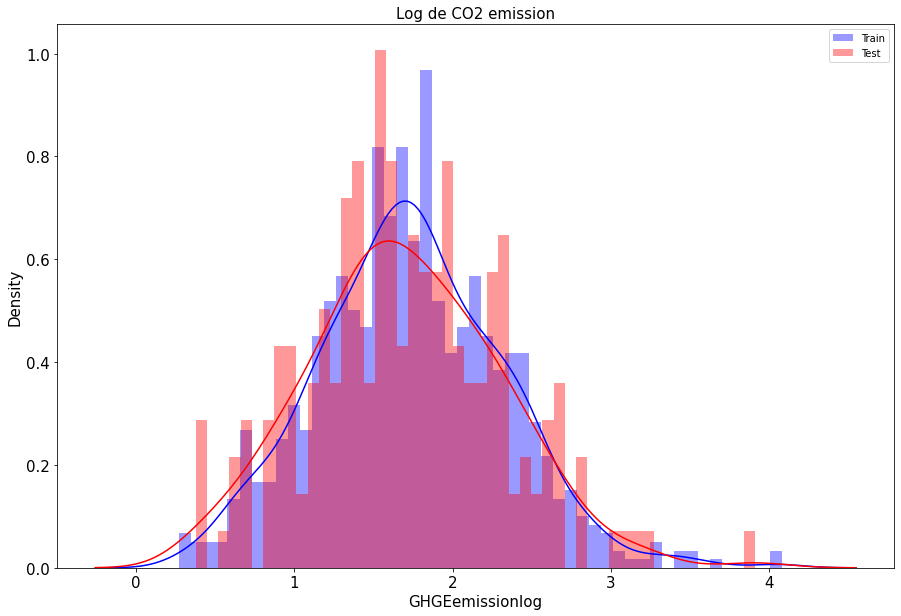

In [327]:
mpl.rcParams['font.size'] =15
f, axes = plt.subplots( figsize=(15, 10))
sns.distplot(Train['GHGEemissionlog'], color="b",ax=axes,label='Train',bins=50);
sns.distplot(Test['GHGEemissionlog'], color="r",ax=axes,label='Test',bins=50);
plt.title('Log de CO2 emission',fontsize=15)
plt.legend(fontsize=10)


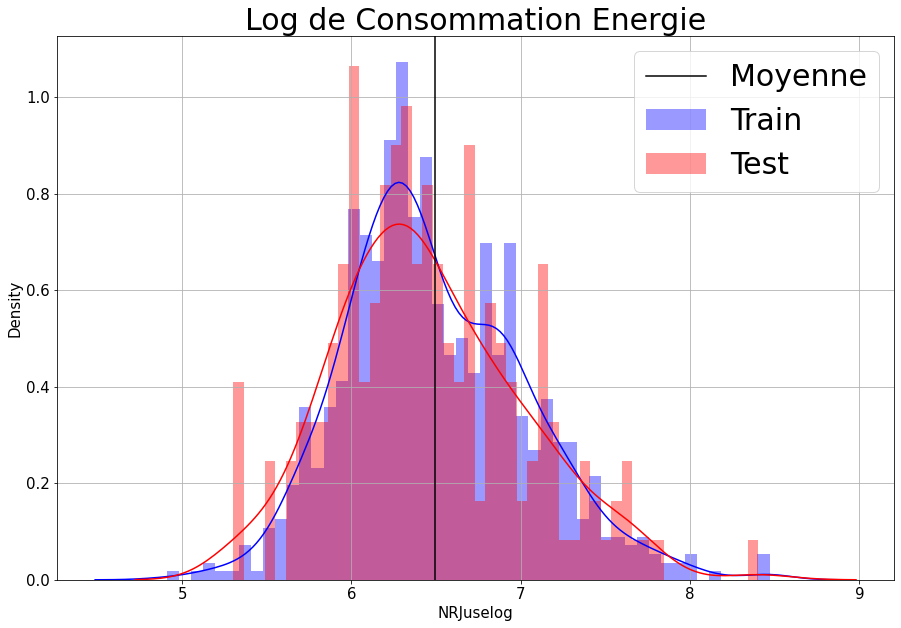

In [328]:
f, axes = plt.subplots( figsize=(15, 10))
sns.distplot(Train['NRJuselog'], color="b",ax=axes,label='Train',bins=50);
sns.distplot(Test['NRJuselog'], color="r",ax=axes,label='Test',bins=50);
plt.title('Log de Consommation Energie',fontsize=30)
plt.axvline(ytr.mean(),color='black',label='Moyenne',linestyle='-')
plt.legend(fontsize=30)
plt.grid()

In [794]:
ytr=Train.NRJuselog
Xtr=Train.drop(['NRJuselog','GHGEemissionlog','NumberofBuildings', 'NumberofFloors',
                'ENERGYSTARScore', 'age',
       'LargestPropertyUseType','SteamPourcent',
                'PropertyGFAParkinglog',
       'ElecPourcent'],axis=1)

In [795]:
ytst=Test.NRJuselog
Xtst=Test.drop(['NRJuselog','GHGEemissionlog','NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore', 'age',
       'LargestPropertyUseType', 'SteamPourcent','PropertyGFAParkinglog',
       'ElecPourcent'],axis=1)

In [ ]:
,'NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore', 'age',
       'LargestPropertyUseType', 'PropertyGFAParkinglog', 'SteamPourcent',
       'ElecPourcent'

In [308]:
Xtst.columns==Xtr.columns

array([ True])

In [281]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ['LargPropertGFAlog']
cat_attribs = []



transf_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


In [282]:
model = DummyRegressor()

In [283]:
full_pipeline = Pipeline([
        ("transf_pipeline",transf_pipeline),
        ("model",model)
    ])


In [284]:
full_pipeline.fit(Xtr,ytr)

Pipeline(steps=[('transf_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['PropertyGFAParkinglog']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('model', DummyRegressor())])

In [285]:
full_pipeline.named_steps

{'transf_pipeline': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('std_scaler',
                                                   StandardScaler())]),
                                  ['PropertyGFAParkinglog']),
                                 ('cat', OneHotEncoder(), [])]),
 'model': DummyRegressor()}

In [289]:
df_res=pd.DataFrame(columns=['explained_var','test_exp_var','error_max','test_error_max','r2','test_r2','RMSE','test_RMSE','MAE','test_MAE'])

In [290]:
df_res=df_res.append(retour_score(Xtr,ytr,Xtst,ytst,full_pipeline,name='Dummyregressor'))

In [291]:
df_res

,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE
Dummyregressor,-2.220446e-16,0.0,1.973587,1.906855,0.0,-0.005362,0.53529,0.553897,0.427786,0.445315


Regression Linéaire seulement avec le feature le plus corrélé

In [292]:
Xtr.head()

,PropertyGFAParkinglog
OSEBuildingID,
24600,0.000000
39332,0.000000
19856,0.000000
744,4.927832
20888,0.000000


In [796]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ['LargPropertGFAlog']
cat_attribs = []

transf_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


model=LinearRegression()

full_pipeline = Pipeline([
        ("transf_pipeline",transf_pipeline),
        ("model",model)
    ])


In [797]:
full_pipeline.fit(Xtr,ytr)

Pipeline(steps=[('transf_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LargPropertGFAlog']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('model', LinearRegression())])

In [316]:
df_res=df_res.append(retour_score(Xtr,ytr,Xtst,ytst,full_pipeline,name='LinearRegression_in_surface'))

In [808]:
df_res.iloc[:2].style.background_gradient(cmap=cm).set_precision(4).highlight_null('gray').highlight_min(axis=0, color='red').highlight_max(axis=0, color='blue')

,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE,Temps_train,Temps_pred
Dummyregressor,-0.0000,0.0000,1.9736,1.9069,0.0000,-0.0054,0.5353,0.5539,0.4278,0.4453,nan,nan
LinearRegression_in_surface,0.6305,0.6641,1.3531,1.2116,0.6305,0.6600,0.3254,0.3221,0.2398,0.2309,nan,nan


Text(0, 0.5, 'Log de la conso')

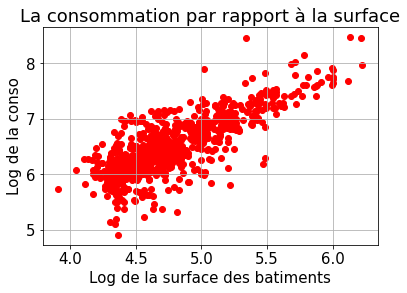

In [331]:
plt.scatter(Xtr.values,ytr.values,c='red')
plt.grid()
plt.title('La consommation par rapport à la surface')
plt.xlabel('Log de la surface des batiments')
plt.ylabel('Log de la conso')

In [338]:
a=pd.DataFrame(np.linspace(3.8,6.3,50),columns=Xtr.columns)

In [335]:
Xtr.shape

(786, 1)

In [799]:
ypred=full_pipeline.predict(a)

Text(0, 0.5, 'Log de la conso')

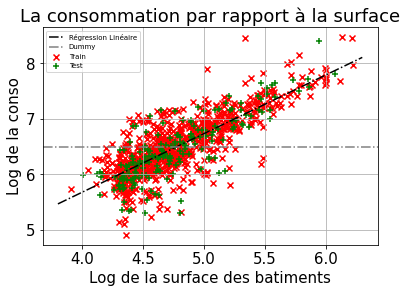

In [805]:
plt.scatter(Xtr.values,ytr.values,c='red',marker='x',label='Train')
plt.plot(a.values,ypred,'-.',c='black',label='Régression Linéaire')
plt.scatter(Xtst.values,ytst.values,marker='+',c='green',label='Test')
plt.axhline(ytr.mean(),color='gray',label='Dummy',linestyle='-.')
plt.grid()
plt.legend(fontsize=7)
plt.title('La consommation par rapport à la surface')
plt.xlabel('Log de la surface des batiments')
plt.ylabel('Log de la conso')

In [371]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ['LargPropertGFAlog']
cat_attribs = []

transf_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


model=ElasticNet()

full_pipeline = Pipeline([
        ("transf_pipeline",transf_pipeline),
        ("model",model)
    ])


In [372]:
parametersGrid = {"model__alpha": [0, 0.0001,0.001, 0.01, 0.1, 1, 10, 100],
                  "model__max_iter": [ 10,100,500,1500],
                      "model__l1_ratio": np.arange(0.0, 1.1, 0.1),
                 }
grid = GridSearchCV(full_pipeline, parametersGrid, scoring='neg_mean_squared_error',refit=True)
grid.fit(Xtr,ytr)

GridSearchCV(estimator=Pipeline(steps=[('transf_pipeline',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['LargPropertGFAlog']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         [])])),
                                       ('model', ElasticNet())]),
             param_grid={'model__alpha': [0, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                          100],
                         'model__l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'model__max_iter': [10, 100, 500, 1500]},
             scoring='neg_mean_squared_error')

In [374]:
grid.best_estimator_

Pipeline(steps=[('transf_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LargPropertGFAlog']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('model', ElasticNet(alpha=0.001, l1_ratio=0.0, max_iter=10))])

In [362]:
parametersGrid = {"model__alpha": [0.001],
                  "model__max_iter": [ 5,8,10,12,15],
                      "model__l1_ratio": [0],
                 }
grid = GridSearchCV(full_pipeline, parametersGrid, scoring='neg_mean_squared_error',refit=True)
grid.fit(Xtr,ytr)

GridSearchCV(estimator=Pipeline(steps=[('transf_pipeline',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['LargPropertGFAlog']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         [])])),
                                       ('model', ElasticNet())]),
             param_grid={'model__alpha': [0.001], 'model__l1_ratio': [0],
                         'model__max_iter': [5, 8, 10, 12, 15]},
             scoring='neg_mean_squared_error')

In [363]:
grid.best_estimator_

Pipeline(steps=[('transf_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LargPropertGFAlog']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('model', ElasticNet(alpha=0.001, l1_ratio=0, max_iter=5))])

In [375]:
parametersGrid = {"model__alpha": [0.001],
                  "model__max_iter": [ 2,3,4,5,6,7],
                      "model__l1_ratio": [0],
                 }
grid = GridSearchCV(full_pipeline, parametersGrid, scoring='neg_mean_squared_error',refit=True)
grid.fit(Xtr,ytr)

GridSearchCV(estimator=Pipeline(steps=[('transf_pipeline',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['LargPropertGFAlog']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         [])])),
                                       ('model', ElasticNet())]),
             param_grid={'model__alpha': [0.001], 'model__l1_ratio': [0],
                         'model__max_iter': [2, 3, 4, 5, 6, 7]},
             scoring='neg_mean_squared_error')

In [410]:
df_res=df_res.append(retour_score(Xtr,ytr,Xtst,ytst,grid,name='Elasticnet_1in_surf'))

In [411]:
df_res

,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE
Dummyregressor,-2.220446e-16,0.000000,1.973587,1.906855,0.000000,-0.005362,0.535290,0.553897,0.427786,0.445315
LinearRegression_in_surface,6.305165e-01,0.664082,1.353113,1.211572,0.630516,0.660009,0.325377,0.322108,0.239847,0.230930
Elasticnet_1in_surf,6.305159e-01,0.664006,1.353711,1.211543,0.630516,0.659932,0.325377,0.322144,0.239843,0.230947


In [381]:
df_restime=pd.DataFrame(columns=['Temps_train','Temps_pred'])

In [401]:

pd.DataFrame(grid.cv_results_)[['mean_fit_time','mean_score_time']].loc[0].values.reshape(1,2)

mean_fit_time      0.005600
mean_score_time    0.002095
Name: 0, dtype: float64

In [428]:
df_restime=df_restime.append(pd.DataFrame(pd.DataFrame(grid.cv_results_)[['mean_fit_time',
                                                               'mean_score_time']].loc[0].values.reshape(1,2),
                                             columns=df_restime.columns,
                  index=['Elasticnet_1in_surf']))

In [385]:
pd.DataFrame(grid.cv_results_).mean_score_time[0]	

0.0020954132080078123

,Temps_train,Temps_pred
Elasticnet_1in_surf,0.005600,0.002095
svr_1in_surf,0.027132,0.010450
XGB_1in_surf,0.179661,0.002992


In [809]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ['LargPropertGFAlog']
cat_attribs = []

transf_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


model=SVR(kernel='rbf')

full_pipeline = Pipeline([
        ("transf_pipeline",transf_pipeline),
        ("model",model)
    ])


In [810]:
grid_svr = GridSearchCV(
    full_pipeline
    ,
    param_grid={"model__C": [1e0, 1e1, 1e2, 1e3], "model__gamma": np.logspace(-4, 2, 5)},refit=True,
     scoring='neg_mean_squared_error'
)
grid_svr.fit(Xtr,ytr)


GridSearchCV(estimator=Pipeline(steps=[('transf_pipeline',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['LargPropertGFAlog']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         [])])),
                                       ('model', SVR())]),
             param_grid={'model__C': [1.0, 10.0, 100.0, 1000.0],
                         'model__gamma': array([1.00000000e-04, 3.16227766e-03, 1.00000000e-01, 3.16227766e+00,
       1.00000000e+02])},
             scoring='neg_mean_squared_error')

In [424]:
grid_svr.best_estimator_

Pipeline(steps=[('transf_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LargPropertGFAlog']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('model', SVR(C=100.0, gamma=0.0031622776601683794))])

In [426]:
df_res=df_res.append(retour_score(Xtr,ytr,Xtst,ytst,grid_svr,name='svr_1in_surf'))

In [429]:
df_restime=df_restime.append(pd.DataFrame(pd.DataFrame(grid_svr.cv_results_)[['mean_fit_time',
                                                               'mean_score_time']].loc[0].values.reshape(1,2),
                                             columns=df_restime.columns,
                  index=['svr_1in_surf']))

In [430]:
df_restime

,Temps_train,Temps_pred
Elasticnet_1in_surf,0.005600,0.002095
svr_1in_surf,0.027132,0.010450


In [811]:
ypred=grid_svr.predict(a)

Text(0, 0.5, 'Log de la conso')

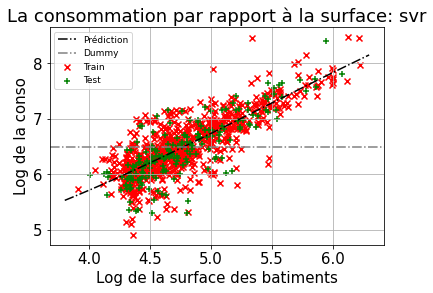

In [812]:
plt.scatter(Xtr.values,ytr.values,c='red',marker='x',label='Train')
plt.plot(a.values,ypred,'-.',c='black',label='Prédiction')
plt.scatter(Xtst.values,ytst.values,marker='+',c='green',label='Test')
plt.axhline(ytr.mean(),color='gray',label='Dummy',linestyle='-.')

plt.grid()
plt.legend(fontsize=9)
plt.title('La consommation par rapport à la surface: svr')
plt.xlabel('Log de la surface des batiments')
plt.ylabel('Log de la conso')

In [442]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ['LargPropertGFAlog']
cat_attribs = []

transf_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


model=RandomForestRegressor()

full_pipeline = Pipeline([
        ("transf_pipeline",transf_pipeline),
        ("model",model)
    ])


In [443]:
param_grid = {
    'model__bootstrap': [True],
    'model__max_depth': [80, 90, 100, 110],
    'model__min_samples_leaf': [3, 4, 5],
    'model__min_samples_split': [8, 10, 12],
    'model__n_estimators': [100, 200, 300, 1000]
}

grid_rf = GridSearchCV(full_pipeline, param_grid = param_grid, cv=3,refit=True)

In [444]:
grid_rf.fit(Xtr,ytr)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transf_pipeline',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['LargPropertGFAlog']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         [])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__bootstrap': [True],
                         'model__max_depth': [80, 90, 100, 110],
                         'model__min_samples_leaf': [3, 4, 5],
                         'model__min_samples_split': [8, 10, 12],
                         'model__n_estimators': [100, 200, 300, 1000]})

In [445]:
grid_rf.best_estimator_

Pipeline(steps=[('transf_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LargPropertGFAlog']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('model',
                 RandomForestRegressor(max_depth=90, min_samples_leaf=5,
                                       min_samples_split=12))])

In [507]:
df_restime=df_restime.append(pd.DataFrame(pd.DataFrame(grid_rf.cv_results_)[['mean_fit_time',
                                                               'mean_score_time']].loc[0].values.reshape(1,2),
                                             columns=df_restime.columns,
                  index=['RF_1in_surf']))

In [515]:
df_res

,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE
Dummyregressor,-2.220446e-16,0.000000,1.973587,1.906855,0.000000,-0.005362,0.535290,0.553897,0.427786,0.445315
LinearRegression_in_surface,6.305165e-01,0.664082,1.353113,1.211572,0.630516,0.660009,0.325377,0.322108,0.239847,0.230930
Elasticnet_1in_surf,6.305159e-01,0.664006,1.353711,1.211543,0.630516,0.659932,0.325377,0.322144,0.239843,0.230947
XGB_1in_surf,6.514641e-01,0.668951,1.277704,1.175535,0.651454,0.663781,0.316023,0.320316,0.231992,0.230208
svr_1in_surf,6.313484e-01,0.666377,1.338326,1.209909,0.631253,0.660964,0.325053,0.321655,0.239806,0.230917
RF_1in_surf,7.259154e-01,0.609166,1.127674,1.291782,0.725902,0.604579,0.280248,0.347374,0.206333,0.257391


In [446]:
ypred=grid_rf.predict(a)

Text(0, 0.5, 'Log de la conso')

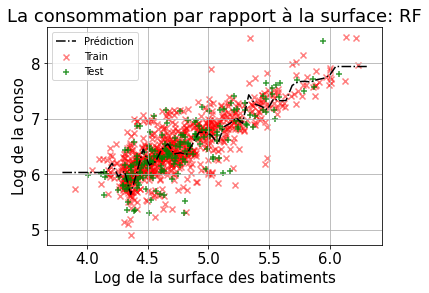

In [452]:
plt.scatter(Xtr.values,ytr.values,c='red',marker='x',label='Train',alpha=0.5)
plt.plot(a.values,ypred,'-.',c='black',label='Prédiction')
plt.scatter(Xtst.values,ytst.values,marker='+',c='green',label='Test',alpha=0.8)

plt.grid()
plt.legend(fontsize=10)
plt.title('La consommation par rapport à la surface: RF')
plt.xlabel('Log de la surface des batiments')
plt.ylabel('Log de la conso')

In [448]:
df_res=df_res.append(retour_score(Xtr,ytr,Xtst,ytst,grid_rf,name='RF_1in_surf'))

In [449]:
df_res

,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE
Dummyregressor,-2.220446e-16,0.000000,1.973587,1.906855,0.000000,-0.005362,0.535290,0.553897,0.427786,0.445315
LinearRegression_in_surface,6.305165e-01,0.664082,1.353113,1.211572,0.630516,0.660009,0.325377,0.322108,0.239847,0.230930
Elasticnet_1in_surf,6.305159e-01,0.664006,1.353711,1.211543,0.630516,0.659932,0.325377,0.322144,0.239843,0.230947
XGB_1in_surf,6.514641e-01,0.668951,1.277704,1.175535,0.651454,0.663781,0.316023,0.320316,0.231992,0.230208
svr_1in_surf,6.313484e-01,0.666377,1.338326,1.209909,0.631253,0.660964,0.325053,0.321655,0.239806,0.230917
RF_1in_surf,7.259154e-01,0.609166,1.127674,1.291782,0.725902,0.604579,0.280248,0.347374,0.206333,0.257391


In [416]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ['LargPropertGFAlog']
cat_attribs = []

transf_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


model=GradientBoostingRegressor()

full_pipeline = Pipeline([
        ("transf_pipeline",transf_pipeline),
        ("model",model)
    ])


In [414]:
parameters = {'model__learning_rate': [0.001,0.01,0.1,0.3,0.5,0.9],
                  'model__subsample'    : [0.2,0.85,1],
                  'model__n_estimators' : [50,100,500,1000],
                  'model__max_depth'    : [1,4,8,10,14],
              
                 }


grid_GBR = GridSearchCV(full_pipeline, param_grid = parameters, cv=3,refit=True)
grid_GBR.fit(Xtr, ytr)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transf_pipeline',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['LargPropertGFAlog']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         [])])),
                                       ('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5,
                                                  0.9],
                         'model__max_depth': [1, 4, 8, 10, 14],
                         'model__n_estimators': [50, 100, 500, 1000],
                         'model__subsample': [0.2, 0.85, 1]})

In [415]:
grid_GBR.best_estimator_

Pipeline(steps=[('transf_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LargPropertGFAlog']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=1,
                                           n_estimators=1000, subsample=0.2))])

In [417]:
parameters = {'model__learning_rate': [0.01],
                  'model__subsample'    : [0.2,0.6],
                  'model__n_estimators' : [700,1000,1500,2000],
                  'model__max_depth'    : [1,4],
              
                 }


grid_GBR = GridSearchCV(full_pipeline, param_grid = parameters, cv=3,refit=True)
grid_GBR.fit(Xtr, ytr)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transf_pipeline',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['LargPropertGFAlog']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         [])])),
                                       ('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.01],
                         'model__max_depth': [1, 4],
                         'model__n_estimators': [700, 1000, 1500, 2000],
                         'model__subsample': [0.2, 0.6]})

In [418]:
grid_GBR.best_estimator_

Pipeline(steps=[('transf_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LargPropertGFAlog']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=1,
                                           n_estimators=1000, subsample=0.2))])

In [419]:
df_res=df_res.append(retour_score(Xtr,ytr,Xtst,ytst,grid_GBR,name='XGB_1in_surf'))

In [431]:
df_restime=df_restime.append(pd.DataFrame(pd.DataFrame(grid_GBR.cv_results_)[['mean_fit_time',
                                                               'mean_score_time']].loc[0].values.reshape(1,2),
                                             columns=df_restime.columns,
                  index=['XGB_1in_surf']))
df_restime

,Temps_train,Temps_pred
Elasticnet_1in_surf,0.005600,0.002095
svr_1in_surf,0.027132,0.010450
XGB_1in_surf,0.179661,0.002992


In [432]:
ypred=grid_GBR.predict(a)

Text(0, 0.5, 'Log de la conso')

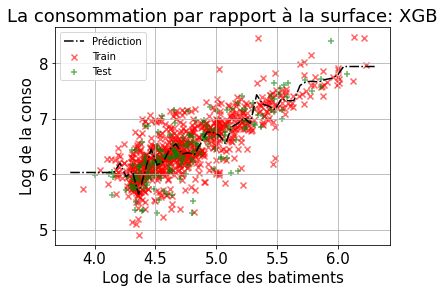

In [453]:
plt.scatter(Xtr.values,ytr.values,c='red',marker='x',label='Train',alpha=0.6)
plt.plot(a.values,ypred,'-.',c='black',label='Prédiction')
plt.scatter(Xtst.values,ytst.values,marker='+',c='green',label='Test',alpha=0.6)

plt.grid()
plt.legend(fontsize=10)
plt.title('La consommation par rapport à la surface: XGB')
plt.xlabel('Log de la surface des batiments')
plt.ylabel('Log de la conso')

In [814]:
cm = sns.light_palette("green", as_cmap=True) 

df_res.iloc[:6].style.background_gradient(cmap=cm).set_precision(4).highlight_null('gray').highlight_min(axis=0, color='red').highlight_max(axis=0, color='blue')

,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE,Temps_train,Temps_pred
Dummyregressor,-0.0000,0.0000,1.9736,1.9069,0.0000,-0.0054,0.5353,0.5539,0.4278,0.4453,nan,nan
LinearRegression_in_surface,0.6305,0.6641,1.3531,1.2116,0.6305,0.6600,0.3254,0.3221,0.2398,0.2309,nan,nan
Elasticnet_1in_surf,0.6305,0.6640,1.3537,1.2115,0.6305,0.6599,0.3254,0.3221,0.2398,0.2309,0.0056,0.0021
XGB_1in_surf,0.6515,0.6690,1.2777,1.1755,0.6515,0.6638,0.3160,0.3203,0.2320,0.2302,0.1797,0.0030
svr_1in_surf,0.6313,0.6664,1.3383,1.2099,0.6313,0.6610,0.3251,0.3217,0.2398,0.2309,0.0271,0.0105
RF_1in_surf,0.7259,0.6092,1.1277,1.2918,0.7259,0.6046,0.2802,0.3474,0.2063,0.2574,0.1098,0.0116


### Analyse des résidus

In [454]:
ypred=grid_GBR.predict(Xtst)

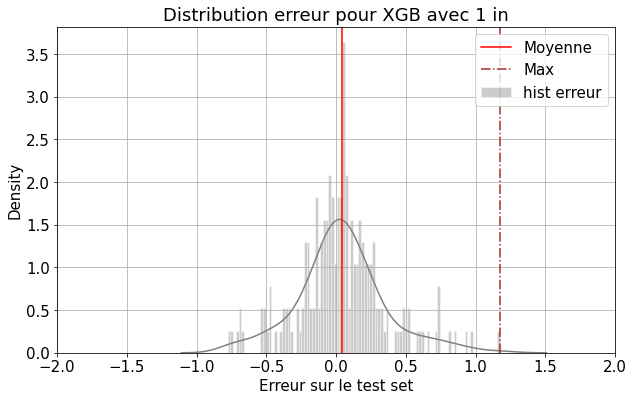

In [469]:
err=pd.DataFrame((ypred-ytst.values))
plt.figure(figsize=(10,6))
sns.distplot(err,bins=100,label='hist erreur',hist_kws={'edgecolor':"white",'color':'gray'},kde_kws={'color':'gray'})
plt.axvline(err.mean().values,color='red',label='Moyenne',linestyle='-')
plt.axvline(abs(err).max().values,color='brown',label='Max',linestyle='-.')
plt.xticks(np.arange(-2, 2.5, 0.5))
plt.xlabel('Erreur sur le test set')
plt.title('Distribution erreur pour XGB avec 1 in')
plt.legend(loc='upper right')
plt.grid()

In [474]:
err.rename({0:'erreur'},axis=1,inplace=True)

In [479]:
err[Test.reset_index().columns]=Test.reset_index()

In [481]:
err.corr()

,erreur,NumberofBuildings,NumberofFloors,ENERGYSTARScore,age,NRJuselog,GHGEemissionlog,LargPropertGFAlog,SteamPourcent,ElecPourcent,PropertyGFAParkinglog,OSEBuildingID
erreur,1.000000,-0.138461,-0.090692,0.514987,0.097779,-0.642073,-0.649072,-0.093667,-0.101028,0.132068,-0.266813,0.130236
NumberofBuildings,-0.138461,1.000000,0.024602,-0.124330,-0.029880,0.180461,0.201538,0.133051,-0.074563,-0.186724,-0.074112,-0.035116
NumberofFloors,-0.090692,0.024602,1.000000,0.042755,-0.128199,0.528532,0.365538,0.602815,0.020509,0.149488,0.387141,-0.345222
ENERGYSTARScore,0.514987,-0.124330,0.042755,1.000000,0.052612,-0.285311,-0.310114,0.007096,-0.096923,0.068164,-0.023459,0.055293
age,0.097779,-0.029880,-0.128199,0.052612,1.000000,-0.248246,-0.154021,-0.269134,0.046564,-0.224306,-0.412295,0.185398
NRJuselog,-0.642073,0.180461,0.528532,-0.285311,-0.248246,1.000000,0.886195,0.816367,0.086466,0.038876,0.380360,-0.573955
GHGEemissionlog,-0.649072,0.201538,0.365538,-0.310114,-0.154021,0.886195,1.000000,0.666533,0.173633,-0.281467,0.225340,-0.455539
LargPropertGFAlog,-0.093667,0.133051,0.602815,0.007096,-0.269134,0.816367,0.666533,1.000000,0.033750,0.137905,0.308946,-0.668895
SteamPourcent,-0.101028,-0.074563,0.020509,-0.096923,0.046564,0.086466,0.173633,0.033750,1.000000,-0.056471,-0.012056,-0.003730
ElecPourcent,0.132068,-0.186724,0.149488,0.068164,-0.224306,0.038876,-0.281467,0.137905,-0.056471,1.000000,0.147458,-0.152100


array([[<AxesSubplot:xlabel='erreur', ylabel='erreur'>,
        <AxesSubplot:xlabel='age', ylabel='erreur'>,
        <AxesSubplot:xlabel='NRJuselog', ylabel='erreur'>],
       [<AxesSubplot:xlabel='erreur', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='NRJuselog', ylabel='age'>],
       [<AxesSubplot:xlabel='erreur', ylabel='NRJuselog'>,
        <AxesSubplot:xlabel='age', ylabel='NRJuselog'>,
        <AxesSubplot:xlabel='NRJuselog', ylabel='NRJuselog'>]],
      dtype=object)

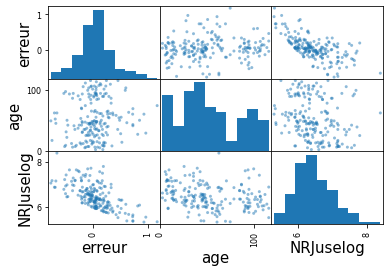

In [482]:
scatter_matrix(err[['erreur','age','NRJuselog']])

In [483]:
Test.LargestPropertyUseType

OSEBuildingID
763              bureau
24451          commerce
19766     entertainment
554            commerce
20415      Enseignement
              ...      
352              bureau
769              bureau
20029    Logement-hotel
21438            bureau
20435          commerce
Name: LargestPropertyUseType, Length: 197, dtype: object

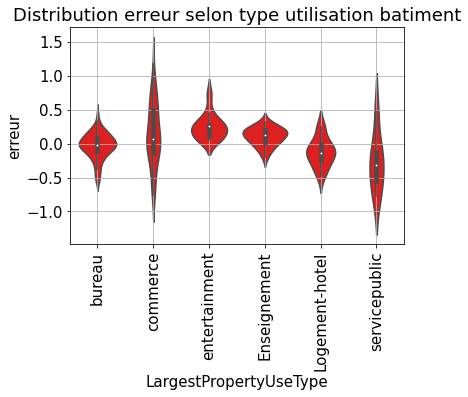

In [503]:
sns.violinplot( x='LargestPropertyUseType', y='erreur', data=err,color='red')

# add title
plt.title("Distribution erreur selon type utilisation batiment")
plt.xticks(rotation=90)
plt.grid()
plt.show()

On peut essayer d'ajouter déjà la catégorie de l'utilisation du batiment qui semble cvontenir des informations. 

In [571]:
ytr=Train.NRJuselog
Xtr=Train.drop(['NRJuselog','GHGEemissionlog','NumberofBuildings', 'NumberofFloors',
                'ENERGYSTARScore', 'age',
                   'SteamPourcent',
                'PropertyGFAParkinglog',
       'ElecPourcent'],axis=1)

In [572]:
Xtr.head()

,LargestPropertyUseType,LargPropertGFAlog
OSEBuildingID,,
24600,bureau,4.639646
39332,Enseignement,5.142095
19856,bureau,4.305007
744,bureau,5.212409
20888,entertainment,4.406915


In [573]:
ytst=Test.NRJuselog
Xtst=Test.drop(['NRJuselog','GHGEemissionlog','NumberofBuildings', 'NumberofFloors',
                'ENERGYSTARScore', 'age',
                   'SteamPourcent',
                'PropertyGFAParkinglog',
       'ElecPourcent'],axis=1)

In [574]:
Xtr.head()

,LargestPropertyUseType,LargPropertGFAlog
OSEBuildingID,,
24600,bureau,4.639646
39332,Enseignement,5.142095
19856,bureau,4.305007
744,bureau,5.212409
20888,entertainment,4.406915


In [575]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ['LargPropertGFAlog']
cat_attribs = ['LargestPropertyUseType']

transf_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


model=LinearRegression()

full_pipeline = Pipeline([
        ("transf_pipeline",transf_pipeline),
        ("model",model)
    ])


In [576]:
full_pipeline.fit(Xtr,ytr)

Pipeline(steps=[('transf_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LargPropertGFAlog']),
                                                 ('cat', OneHotEncoder(),
                                                  ['LargestPropertyUseType'])])),
                ('model', LinearRegression())])

In [577]:
df_res=df_res.append(retour_score(Xtr,ytr,Xtst,ytst,full_pipeline,name='LinearReg_2in_surftypes'))

In [585]:
df_res

,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE
Dummyregressor,-2.220446e-16,0.000000,1.973587,1.906855,0.000000,-0.005362,0.535290,0.553897,0.427786,0.445315
LinearRegression_in_surface,6.305165e-01,0.664082,1.353113,1.211572,0.630516,0.660009,0.325377,0.322108,0.239847,0.230930
Elasticnet_1in_surf,6.305159e-01,0.664006,1.353711,1.211543,0.630516,0.659932,0.325377,0.322144,0.239843,0.230947
XGB_1in_surf,6.514641e-01,0.668951,1.277704,1.175535,0.651454,0.663781,0.316023,0.320316,0.231992,0.230208
svr_1in_surf,6.313484e-01,0.666377,1.338326,1.209909,0.631253,0.660964,0.325053,0.321655,0.239806,0.230917
RF_1in_surf,7.259154e-01,0.609166,1.127674,1.291782,0.725902,0.604579,0.280248,0.347374,0.206333,0.257391
LinearReg_2in_surftypes,6.786090e-01,0.710040,1.327173,1.117444,0.678609,0.706439,0.303463,0.299307,0.214371,0.213342
RF_2in_surftypes,6.892312e-01,0.597253,5.986409,5.583857,-78.384563,-72.896609,4.769331,4.748758,4.759986,4.735799


In [586]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ['LargPropertGFAlog']
cat_attribs = ['LargestPropertyUseType']

transf_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


model=GradientBoostingRegressor()

full_pipeline = Pipeline([
        ("transf_pipeline",transf_pipeline),
        ("model",model)
    ])


In [587]:
parameters = {'model__learning_rate': [0.001,0.01,0.1,0.3],
                  'model__subsample'    : [0.2,0.85],
                  'model__n_estimators' : [50,100,500,1000],
                  'model__max_depth'    : [1,4,8],
              
                 }


grid_GBR_2in = GridSearchCV(full_pipeline, param_grid = parameters, cv=3,refit=True)
grid_GBR_2in.fit(Xtr, ytr)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transf_pipeline',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['LargPropertGFAlog']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['LargestPropertyUseType'])])),
                                       ('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.001, 0.01, 0.1, 0.3],
                         'model__max_depth': [1, 4, 8],
                         'model__n_estimators': [50, 100, 500, 1000],
                         'model__subsample': [0.2, 0.85]})

In [588]:
grid_GBR_2in.best_estimator_


Pipeline(steps=[('transf_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LargPropertGFAlog']),
                                                 ('cat', OneHotEncoder(),
                                                  ['LargestPropertyUseType'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=1,
                                           n_estimators=1000, subsample=0.2))])

In [597]:
df_res=df_res.append(retour_score(Xtr,ytr,Xtst,ytst,grid_GBR_2in,name='XGB_2in_surftypes'))

In [608]:
df_restime=df_restime.append(pd.DataFrame(pd.DataFrame(grid_GBR_2in.cv_results_)[['mean_fit_time',
                                                               'mean_score_time']].loc[0].values.reshape(1,2),
                                             columns=df_restime.columns,
                  index=['XGB_2in_surftypes']))

In [609]:
df_restime

,Temps_train,Temps_pred
Elasticnet_1in_surf,0.005600,0.002095
svr_1in_surf,0.027132,0.010450
XGB_1in_surf,0.179661,0.002992
RF_1in_surf,0.109754,0.011649
Dummyregressor,NaN,NaN
LinearRegression_in_surface,NaN,NaN
XGB_2in_surftypes,0.036779,0.004527


In [589]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ['LargPropertGFAlog']
cat_attribs = ['LargestPropertyUseType']

transf_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


model=RandomForestRegressor()

full_pipeline = Pipeline([
        ("transf_pipeline",transf_pipeline),
        ("model",model)
    ])


In [590]:
param_grid = {
    'model__bootstrap': [True],
    'model__max_depth': [80, 90, 100, 110,150],
    'model__min_samples_leaf': [3],
    'model__min_samples_split': [12],
    'model__n_estimators': [100,500, 1000,1500]
}

grid_rf = GridSearchCV(full_pipeline, param_grid = param_grid, cv=3,refit=True)

In [591]:
grid_rf.fit(Xtr,ytr)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transf_pipeline',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['LargPropertGFAlog']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['LargestPropertyUseType'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__bootstrap': [True],
                         'model__max_depth': [80, 90, 100, 110, 150],
                         'model__min_samples_leaf': [3],
                         'model__min_samples_split': [12],
                         'model__n_estimators': [100, 500, 1000, 1500]})

In [592]:
grid_rf.best_estimator_

Pipeline(steps=[('transf_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LargPropertGFAlog']),
                                                 ('cat', OneHotEncoder(),
                                                  ['LargestPropertyUseType'])])),
                ('model',
                 RandomForestRegressor(max_depth=80, min_samples_leaf=3,
                                       min_samples_split=12))])

In [601]:
df_res=df_res.append(retour_score(Xtr,ytr,Xtst,ytst,grid_rf,name='RF_2in_surftypes'))

In [610]:
df_restime=df_restime.append(pd.DataFrame(pd.DataFrame(grid_rf.cv_results_)[['mean_fit_time',
                                                               'mean_score_time']].loc[0].values.reshape(1,2),
                                             columns=df_restime.columns,
                  index=['RF_2in_surftypes']))

In [611]:
df_restime

,Temps_train,Temps_pred
Elasticnet_1in_surf,0.005600,0.002095
svr_1in_surf,0.027132,0.010450
XGB_1in_surf,0.179661,0.002992
RF_1in_surf,0.109754,0.011649
Dummyregressor,NaN,NaN
LinearRegression_in_surface,NaN,NaN
XGB_2in_surftypes,0.036779,0.004527
RF_2in_surftypes,0.144970,0.010281


In [594]:
grid_rf.best_params_

{'model__bootstrap': True,
 'model__max_depth': 80,
 'model__min_samples_leaf': 3,
 'model__min_samples_split': 12,
 'model__n_estimators': 100}

In [818]:
cm = sns.light_palette("green", as_cmap=True) 

df_res.iloc[[3,9,7,8]].style.background_gradient(cmap=cm).set_precision(4).highlight_null('gray').highlight_min(axis=0, color='red').highlight_max(axis=0, color='blue')

,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE,Temps_train,Temps_pred
XGB_1in_surf,0.6515,0.6690,1.2777,1.1755,0.6515,0.6638,0.3160,0.3203,0.2320,0.2302,0.1797,0.0030
ElasticNet_2in_surftypes,0.6786,0.7100,1.3271,1.1178,0.6786,0.7064,0.3035,0.2993,0.2144,0.2135,0.0085,0.0038
XGB_2in_surftypes,0.6905,0.7091,1.2468,1.1128,0.6905,0.7042,0.2978,0.3004,0.2117,0.2136,0.0368,0.0045
RF_2in_surftypes,0.7906,0.7060,0.9741,1.1449,0.7906,0.7024,0.2450,0.3014,0.1720,0.2174,0.1450,0.0103


In [816]:
[3,7,8,9]

,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE,Temps_train,Temps_pred
Dummyregressor,-2.220446e-16,0.000000,1.973587,1.906855,0.000000,-0.005362,0.535290,0.553897,0.427786,0.445315,NaN,NaN
LinearRegression_in_surface,6.305165e-01,0.664082,1.353113,1.211572,0.630516,0.660009,0.325377,0.322108,0.239847,0.230930,NaN,NaN
Elasticnet_1in_surf,6.305159e-01,0.664006,1.353711,1.211543,0.630516,0.659932,0.325377,0.322144,0.239843,0.230947,0.005600,0.002095
XGB_1in_surf,6.514641e-01,0.668951,1.277704,1.175535,0.651454,0.663781,0.316023,0.320316,0.231992,0.230208,0.179661,0.002992
svr_1in_surf,6.313484e-01,0.666377,1.338326,1.209909,0.631253,0.660964,0.325053,0.321655,0.239806,0.230917,0.027132,0.010450
RF_1in_surf,7.259154e-01,0.609166,1.127674,1.291782,0.725902,0.604579,0.280248,0.347374,0.206333,0.257391,0.109754,0.011649
LinearReg_2in_surftypes,6.786090e-01,0.710040,1.327173,1.117444,0.678609,0.706439,0.303463,0.299307,0.214371,0.213342,NaN,NaN
XGB_2in_surftypes,6.904825e-01,0.709114,1.246763,1.112761,0.690476,0.704225,0.297808,0.300433,0.211746,0.213596,0.036779,0.004527
RF_2in_surftypes,7.905983e-01,0.705964,0.974150,1.144866,0.790598,0.702390,0.244951,0.301364,0.171952,0.217386,0.144970,0.010281
ElasticNet_2in_surftypes,6.785941e-01,0.709975,1.327141,1.117760,0.678594,0.706365,0.303470,0.299345,0.214368,0.213455,0.008490,0.003798


In [603]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ['LargPropertGFAlog']
cat_attribs = ['LargestPropertyUseType']

transf_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


model=ElasticNet()

full_pipeline = Pipeline([
        ("transf_pipeline",transf_pipeline),
        ("model",model)
    ])


In [604]:
parametersGrid = {"model__alpha": [0, 0.0001,0.001, 0.01, 0.1, 1, 10, 100],
                  "model__max_iter": [ 10,100,500,1500],
                      "model__l1_ratio": np.arange(0.0, 1.1, 0.1),
                 }
grid_en = GridSearchCV(full_pipeline, parametersGrid, scoring='neg_mean_squared_error',refit=True)
grid_en.fit(Xtr,ytr)

GridSearchCV(estimator=Pipeline(steps=[('transf_pipeline',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['LargPropertGFAlog']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['LargestPropertyUseType'])])),
                                       ('model', ElasticNet())]),
             param_grid={'model__alpha': [0, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                          100],
                         'model__l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'model__max_iter': [10, 100, 500, 1500]},
             scoring='neg_mean_squared_error')

In [606]:
df_res=df_res.append(retour_score(Xtr,ytr,Xtst,ytst,grid_en,name='ElasticNet_2in_surftypes'))

In [612]:
df_restime=df_restime.append(pd.DataFrame(pd.DataFrame(grid_en.cv_results_)[['mean_fit_time',
                                                               'mean_score_time']].loc[0].values.reshape(1,2),
                                             columns=df_restime.columns,
                  index=['ElasticNet_2in_surftypes']))

In [613]:
df_restime

,Temps_train,Temps_pred
Elasticnet_1in_surf,0.005600,0.002095
svr_1in_surf,0.027132,0.010450
XGB_1in_surf,0.179661,0.002992
RF_1in_surf,0.109754,0.011649
Dummyregressor,NaN,NaN
LinearRegression_in_surface,NaN,NaN
XGB_2in_surftypes,0.036779,0.004527
RF_2in_surftypes,0.144970,0.010281
ElasticNet_2in_surftypes,0.008490,0.003798


In [615]:
ytr=Train.NRJuselog
Xtr=Train.drop(['NRJuselog','GHGEemissionlog','NumberofBuildings', 'NumberofFloors',
                'ENERGYSTARScore',
                   'SteamPourcent',
                'PropertyGFAParkinglog',
       'ElecPourcent'],axis=1)

In [617]:
ytst=Test.NRJuselog
Xtst=Test.drop(['NRJuselog','GHGEemissionlog','NumberofBuildings', 'NumberofFloors',
                'ENERGYSTARScore',
                   'SteamPourcent',
                'PropertyGFAParkinglog',
       'ElecPourcent'],axis=1)

In [618]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ['LargPropertGFAlog','age']
cat_attribs = ['LargestPropertyUseType']

transf_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


model=LinearRegression()

full_pipeline = Pipeline([
        ("transf_pipeline",transf_pipeline),
        ("model",model)
    ])


In [619]:
full_pipeline.fit(Xtr,ytr)

Pipeline(steps=[('transf_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LargPropertGFAlog', 'age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['LargestPropertyUseType'])])),
                ('model', LinearRegression())])

In [620]:
df_res=df_res.append(retour_score(Xtr,ytr,Xtst,ytst,full_pipeline,name='ElasticNet_3in_surftypesage'))

In [621]:
df_res

,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE
Dummyregressor,-2.220446e-16,0.000000,1.973587,1.906855,0.000000,-0.005362,0.535290,0.553897,0.427786,0.445315
LinearRegression_in_surface,6.305165e-01,0.664082,1.353113,1.211572,0.630516,0.660009,0.325377,0.322108,0.239847,0.230930
Elasticnet_1in_surf,6.305159e-01,0.664006,1.353711,1.211543,0.630516,0.659932,0.325377,0.322144,0.239843,0.230947
XGB_1in_surf,6.514641e-01,0.668951,1.277704,1.175535,0.651454,0.663781,0.316023,0.320316,0.231992,0.230208
svr_1in_surf,6.313484e-01,0.666377,1.338326,1.209909,0.631253,0.660964,0.325053,0.321655,0.239806,0.230917
RF_1in_surf,7.259154e-01,0.609166,1.127674,1.291782,0.725902,0.604579,0.280248,0.347374,0.206333,0.257391
LinearReg_2in_surftypes,6.786090e-01,0.710040,1.327173,1.117444,0.678609,0.706439,0.303463,0.299307,0.214371,0.213342
XGB_2in_surftypes,6.904825e-01,0.709114,1.246763,1.112761,0.690476,0.704225,0.297808,0.300433,0.211746,0.213596
RF_2in_surftypes,7.905983e-01,0.705964,0.974150,1.144866,0.790598,0.702390,0.244951,0.301364,0.171952,0.217386
ElasticNet_2in_surftypes,6.785941e-01,0.709975,1.327141,1.117760,0.678594,0.706365,0.303470,0.299345,0.214368,0.213455


In [622]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ['LargPropertGFAlog','age']
cat_attribs = ['LargestPropertyUseType']

transf_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


model=ElasticNet()

full_pipeline = Pipeline([
        ("transf_pipeline",transf_pipeline),
        ("model",model)
    ])


In [623]:
parametersGrid = {"model__alpha": [0, 0.0001,0.001, 0.01, 0.1,  10],
                  "model__max_iter": [ 5,10,100],
                      "model__l1_ratio": np.arange(0.0, 1.1, 0.1),
                 }
grid_en3 = GridSearchCV(full_pipeline, parametersGrid, scoring='neg_mean_squared_error',refit=True)
grid_en3.fit(Xtr,ytr)

GridSearchCV(estimator=Pipeline(steps=[('transf_pipeline',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['LargPropertGFAlog',
                                                                          'age']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['LargestPropertyUseType'])])),
                                       ('model', ElasticNet())]),
             param_grid={'model__alpha': [0, 0.0001, 0.001, 0.01, 0.1, 10],
                         'model__l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'model__max_iter': [5, 10, 100]},
             scoring='neg_mean_squared_error')

In [624]:
df_res=df_res.append(retour_score(Xtr,ytr,Xtst,ytst,grid_en3,name='ElasticNet__3in_surftypesage'))

In [640]:
df_restime

,Temps_train,Temps_pred
Elasticnet_1in_surf,0.005600,0.002095
svr_1in_surf,0.027132,0.010450
XGB_1in_surf,0.179661,0.002992
RF_1in_surf,0.109754,0.011649
Dummyregressor,NaN,NaN
LinearRegression_in_surface,NaN,NaN
XGB_2in_surftypes,0.036779,0.004527
RF_2in_surftypes,0.144970,0.010281
ElasticNet_2in_surftypes,0.008490,0.003798
ElasticNet__3in_surftypesage,0.007620,0.003525


In [626]:
df_restime=df_restime.append(pd.DataFrame(pd.DataFrame(grid_en3.cv_results_)[['mean_fit_time',
                                                               'mean_score_time']].loc[0].values.reshape(1,2),
                                             columns=df_restime.columns,
                  index=['ElasticNet__3in_surftypesage']))

In [625]:
df_res

,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE
Dummyregressor,-2.220446e-16,0.000000,1.973587,1.906855,0.000000,-0.005362,0.535290,0.553897,0.427786,0.445315
LinearRegression_in_surface,6.305165e-01,0.664082,1.353113,1.211572,0.630516,0.660009,0.325377,0.322108,0.239847,0.230930
Elasticnet_1in_surf,6.305159e-01,0.664006,1.353711,1.211543,0.630516,0.659932,0.325377,0.322144,0.239843,0.230947
XGB_1in_surf,6.514641e-01,0.668951,1.277704,1.175535,0.651454,0.663781,0.316023,0.320316,0.231992,0.230208
svr_1in_surf,6.313484e-01,0.666377,1.338326,1.209909,0.631253,0.660964,0.325053,0.321655,0.239806,0.230917
RF_1in_surf,7.259154e-01,0.609166,1.127674,1.291782,0.725902,0.604579,0.280248,0.347374,0.206333,0.257391
LinearReg_2in_surftypes,6.786090e-01,0.710040,1.327173,1.117444,0.678609,0.706439,0.303463,0.299307,0.214371,0.213342
XGB_2in_surftypes,6.904825e-01,0.709114,1.246763,1.112761,0.690476,0.704225,0.297808,0.300433,0.211746,0.213596
RF_2in_surftypes,7.905983e-01,0.705964,0.974150,1.144866,0.790598,0.702390,0.244951,0.301364,0.171952,0.217386
ElasticNet_2in_surftypes,6.785941e-01,0.709975,1.327141,1.117760,0.678594,0.706365,0.303470,0.299345,0.214368,0.213455


In [628]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ['LargPropertGFAlog','age']
cat_attribs = ['LargestPropertyUseType']

transf_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


model=GradientBoostingRegressor()

full_pipeline = Pipeline([
        ("transf_pipeline",transf_pipeline),
        ("model",model)
    ])


In [629]:
parameters = {'model__learning_rate': [0.001,0.01,0.1,0.3],
                  'model__subsample'    : [0.2,0.85],
                  'model__n_estimators' : [50,100,500,1000],
                  'model__max_depth'    : [1,4,8],
              
                 }


grid_GBR_3in = GridSearchCV(full_pipeline, param_grid = parameters, cv=3,refit=True)
grid_GBR_3in.fit(Xtr, ytr)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transf_pipeline',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['LargPropertGFAlog',
                                                                          'age']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['LargestPropertyUseType'])])),
                                       ('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.001, 0.01, 0.1, 0.3],
                         'model__max_depth': [1, 4, 8],
                         'model__n_estimators': [50, 100, 500, 1000],
                         'model__subsample': [0.2, 0.85]})

In [630]:
grid_GBR_3in.best_estimator_

Pipeline(steps=[('transf_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LargPropertGFAlog', 'age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['LargestPropertyUseType'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=4,
                                           n_estimators=500, subsample=0.2))])

In [631]:
df_res=df_res.append(retour_score(Xtr,ytr,Xtst,ytst,grid_GBR_3in,name='XGB_3in_surftypesage'))

In [641]:
df_restime=df_restime.append(pd.DataFrame(pd.DataFrame(grid_GBR_3in.cv_results_)[['mean_fit_time',
                                                               'mean_score_time']].loc[0].values.reshape(1,2),
                                             columns=df_restime.columns,
                  index=['XGB_3in_surftypesage']))

In [633]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ['LargPropertGFAlog','age']
cat_attribs = ['LargestPropertyUseType']

transf_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


model=RandomForestRegressor()

full_pipeline = Pipeline([
        ("transf_pipeline",transf_pipeline),
        ("model",model)
    ])


In [634]:
param_grid = {
    'model__bootstrap': [True],
    'model__max_depth': [80, 90, 100, 110,150],
    'model__min_samples_leaf': [3],
    'model__min_samples_split': [12],
    'model__n_estimators': [100,500, 1000,1500]
}

grid_rf3 = GridSearchCV(full_pipeline, param_grid = param_grid, cv=3,refit=True)

In [635]:
grid_rf3.fit(Xtr,ytr)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transf_pipeline',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['LargPropertGFAlog',
                                                                          'age']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['LargestPropertyUseType'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__bootstrap': [True],
                         'model__max_depth': [80, 90, 100, 110, 150],
                         'model__min_samples_leaf': [3],
                         'model__min_samples_split': [12],
                         'model__n_estimators': [100, 500, 1000, 1500]})

In [636]:
grid_rf3.best_estimator_

Pipeline(steps=[('transf_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LargPropertGFAlog', 'age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['LargestPropertyUseType'])])),
                ('model',
                 RandomForestRegressor(max_depth=100, min_samples_leaf=3,
                                       min_samples_split=12,
                                       n_estimators=500))])

In [637]:
df_res=df_res.append(retour_score(Xtr,ytr,Xtst,ytst,grid_rf3,name='RF_3in_surftypesage'))

In [642]:
df_restime=df_restime.append(pd.DataFrame(pd.DataFrame(grid_rf3.cv_results_)[['mean_fit_time',
                                                               'mean_score_time']].loc[0].values.reshape(1,2),
                                             columns=df_restime.columns,
                  index=['RF_3in_surftypesage']))

In [639]:
Train.head()

,NumberofBuildings,NumberofFloors,ENERGYSTARScore,age,LargestPropertyUseType,NRJuselog,GHGEemissionlog,LargPropertGFAlog,SteamPourcent,ElecPourcent,PropertyGFAParkinglog
OSEBuildingID,,,,,,,,,,,
24600,1.0,1.0,89.0,45.5,bureau,6.495000,2.026942,4.639646,0,0,0.000000
39332,1.0,2.0,86.0,6.5,Enseignement,6.682342,2.087107,5.142095,0,1,0.000000
19856,1.0,3.0,69.0,113.5,bureau,5.936042,0.846337,4.305007,0,1,0.000000
744,1.0,7.0,88.5,15.5,bureau,6.924903,1.823213,5.212409,0,1,4.927832
20888,1.0,2.0,83.5,85.5,entertainment,5.766064,1.194930,4.406915,0,1,0.000000


On peut tester d'ajouter seulement s'il y a de l'electricité comme source d'energie ou si c'est une autre

In [645]:
df_res.shape,df_restime.shape

((14, 10), (12, 2))

In [646]:
ytr=Train.NRJuselog
Xtr=Train.drop(['NRJuselog','GHGEemissionlog','NumberofBuildings', 'NumberofFloors',
                'ENERGYSTARScore',
                   'SteamPourcent',
                'PropertyGFAParkinglog',
       ],axis=1)

In [648]:
ytst=Test.NRJuselog
Xtst=Test.drop(['NRJuselog','GHGEemissionlog','NumberofBuildings', 'NumberofFloors',
                'ENERGYSTARScore',
                   'SteamPourcent',
                'PropertyGFAParkinglog',
       ],axis=1)

In [650]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ['LargPropertGFAlog','age']
cat_attribs = ['LargestPropertyUseType','ElecPourcent']

transf_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


model=LinearRegression()

full_pipeline = Pipeline([
        ("transf_pipeline",transf_pipeline),
        ("model",model)
    ])


In [728]:
import timeit

start = timeit.default_timer()

full_pipeline.fit(Xtr,ytr)


print('Time: ', timeit.default_timer() - start)  

Time:  0.2951554000028409


In [729]:
df_restime

,Temps_train,Temps_pred
Elasticnet_1in_surf,0.005600,0.002095
svr_1in_surf,0.027132,0.010450
XGB_1in_surf,0.179661,0.002992
RF_1in_surf,0.109754,0.011649
Dummyregressor,NaN,NaN
LinearRegression_in_surface,NaN,NaN
XGB_2in_surftypes,0.036779,0.004527
RF_2in_surftypes,0.144970,0.010281
ElasticNet_2in_surftypes,0.008490,0.003798
ElasticNet__3in_surftypesage,0.007620,0.003525


In [652]:
full_pipeline.fit(Xtr,ytr)

Pipeline(steps=[('transf_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LargPropertGFAlog', 'age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['LargestPropertyUseType',
                                                   'ElecPourcent'])])),
                ('model', LinearRegression())])

In [654]:
df_res=df_res.append(retour_score(Xtr,ytr,Xtst,ytst,full_pipeline,name='LinearReg_4in_surftypesageElec'))

In [655]:
df_res

,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE
Dummyregressor,-2.220446e-16,0.000000,1.973587,1.906855,0.000000,-0.005362,0.535290,0.553897,0.427786,0.445315
LinearRegression_in_surface,6.305165e-01,0.664082,1.353113,1.211572,0.630516,0.660009,0.325377,0.322108,0.239847,0.230930
Elasticnet_1in_surf,6.305159e-01,0.664006,1.353711,1.211543,0.630516,0.659932,0.325377,0.322144,0.239843,0.230947
XGB_1in_surf,6.514641e-01,0.668951,1.277704,1.175535,0.651454,0.663781,0.316023,0.320316,0.231992,0.230208
svr_1in_surf,6.313484e-01,0.666377,1.338326,1.209909,0.631253,0.660964,0.325053,0.321655,0.239806,0.230917
RF_1in_surf,7.259154e-01,0.609166,1.127674,1.291782,0.725902,0.604579,0.280248,0.347374,0.206333,0.257391
LinearReg_2in_surftypes,6.786090e-01,0.710040,1.327173,1.117444,0.678609,0.706439,0.303463,0.299307,0.214371,0.213342
XGB_2in_surftypes,6.904825e-01,0.709114,1.246763,1.112761,0.690476,0.704225,0.297808,0.300433,0.211746,0.213596
RF_2in_surftypes,7.905983e-01,0.705964,0.974150,1.144866,0.790598,0.702390,0.244951,0.301364,0.171952,0.217386
ElasticNet_2in_surftypes,6.785941e-01,0.709975,1.327141,1.117760,0.678594,0.706365,0.303470,0.299345,0.214368,0.213455


#### Essayons à présent de prendre en compte toutes les variables et de voir par importances

In [656]:
ytr=Train.NRJuselog
Xtr=Train.drop(['NRJuselog','GHGEemissionlog'
       ],axis=1)

In [657]:
ytst=Test.NRJuselog
Xtst=Test.drop(['NRJuselog','GHGEemissionlog'
       ],axis=1)

In [658]:
Xtr.columns

Index(['NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore', 'age',
       'LargestPropertyUseType', 'LargPropertGFAlog', 'SteamPourcent',
       'ElecPourcent', 'PropertyGFAParkinglog'],
      dtype='object')

In [659]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ['NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore', 'age',
        'LargPropertGFAlog', 
        'PropertyGFAParkinglog']
cat_attribs = ['LargestPropertyUseType','ElecPourcent','SteamPourcent']

transf_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


model=LinearRegression()

full_pipeline = Pipeline([
        ("transf_pipeline",transf_pipeline),
        ("model",model)
    ])


In [660]:
full_pipeline.fit(Xtr,ytr)

Pipeline(steps=[('transf_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore', 'age',
                                                   'LargPropertGFAlog',
                                                   'PropertyGFAParkinglog']),
                                                 ('cat', OneHotEncoder(),
                                                  ['LargestPropertyUseType',
                                                   'ElecPourcent',
                                                   'SteamPourcent'])])),
                ('model', LinearRegression())])

In [661]:
df_res=df_res.append(retour_score(Xtr,ytr,Xtst,ytst,full_pipeline,name='LinearReg_allin'))

In [662]:
df_res

,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE
Dummyregressor,-2.220446e-16,0.000000,1.973587,1.906855,0.000000,-0.005362,0.535290,0.553897,0.427786,0.445315
LinearRegression_in_surface,6.305165e-01,0.664082,1.353113,1.211572,0.630516,0.660009,0.325377,0.322108,0.239847,0.230930
Elasticnet_1in_surf,6.305159e-01,0.664006,1.353711,1.211543,0.630516,0.659932,0.325377,0.322144,0.239843,0.230947
XGB_1in_surf,6.514641e-01,0.668951,1.277704,1.175535,0.651454,0.663781,0.316023,0.320316,0.231992,0.230208
svr_1in_surf,6.313484e-01,0.666377,1.338326,1.209909,0.631253,0.660964,0.325053,0.321655,0.239806,0.230917
RF_1in_surf,7.259154e-01,0.609166,1.127674,1.291782,0.725902,0.604579,0.280248,0.347374,0.206333,0.257391
LinearReg_2in_surftypes,6.786090e-01,0.710040,1.327173,1.117444,0.678609,0.706439,0.303463,0.299307,0.214371,0.213342
XGB_2in_surftypes,6.904825e-01,0.709114,1.246763,1.112761,0.690476,0.704225,0.297808,0.300433,0.211746,0.213596
RF_2in_surftypes,7.905983e-01,0.705964,0.974150,1.144866,0.790598,0.702390,0.244951,0.301364,0.171952,0.217386
ElasticNet_2in_surftypes,6.785941e-01,0.709975,1.327141,1.117760,0.678594,0.706365,0.303470,0.299345,0.214368,0.213455


In [663]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ['NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore', 'age',
        'LargPropertGFAlog', 
        'PropertyGFAParkinglog']
cat_attribs = ['LargestPropertyUseType','ElecPourcent','SteamPourcent']

transf_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


model=ElasticNet()

full_pipeline = Pipeline([
        ("transf_pipeline",transf_pipeline),
        ("model",model)
    ])


In [664]:
parametersGrid = {"model__alpha": [0, 0.0001,0.001, 0.01, 0.1,  10],
                  "model__max_iter": [ 5,10,100],
                      "model__l1_ratio": np.arange(0.0, 1.1, 0.1),
                 }
grid_enall = GridSearchCV(full_pipeline, parametersGrid, scoring='neg_mean_squared_error',refit=True)
grid_enall.fit(Xtr,ytr)

GridSearchCV(estimator=Pipeline(steps=[('transf_pipeline',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'ENERGYSTARScore',
                                                                          'age',
                                                                          'LargPropertGFAlog',
                                                                          'PropertyGFAParkinglog']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['LargestPropertyUseType',
                                                                          'ElecPourcent',
                                                                          'SteamPourcent'])])),
                                       ('model', ElasticNet())]),
             param_grid={'model__alpha': [0, 0.0001, 0.001, 0.01, 0.1, 10],
                         'model__l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'model__max_iter': [5, 10, 100]},
             scoring='neg_mean_squared_error')

In [665]:
df_res=df_res.append(retour_score(Xtr,ytr,Xtst,ytst,grid_enall,name='ElasticNet_allin'))

In [730]:
df_restime=df_restime.append(pd.DataFrame(pd.DataFrame(grid_enall.cv_results_)[['mean_fit_time',
                                                               'mean_score_time']].loc[0].values.reshape(1,2),
                                             columns=df_restime.columns,
                  index=['ElasticNet_allin']))

In [666]:
df_res

,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE
Dummyregressor,-2.220446e-16,0.000000,1.973587,1.906855,0.000000,-0.005362,0.535290,0.553897,0.427786,0.445315
LinearRegression_in_surface,6.305165e-01,0.664082,1.353113,1.211572,0.630516,0.660009,0.325377,0.322108,0.239847,0.230930
Elasticnet_1in_surf,6.305159e-01,0.664006,1.353711,1.211543,0.630516,0.659932,0.325377,0.322144,0.239843,0.230947
XGB_1in_surf,6.514641e-01,0.668951,1.277704,1.175535,0.651454,0.663781,0.316023,0.320316,0.231992,0.230208
svr_1in_surf,6.313484e-01,0.666377,1.338326,1.209909,0.631253,0.660964,0.325053,0.321655,0.239806,0.230917
RF_1in_surf,7.259154e-01,0.609166,1.127674,1.291782,0.725902,0.604579,0.280248,0.347374,0.206333,0.257391
LinearReg_2in_surftypes,6.786090e-01,0.710040,1.327173,1.117444,0.678609,0.706439,0.303463,0.299307,0.214371,0.213342
XGB_2in_surftypes,6.904825e-01,0.709114,1.246763,1.112761,0.690476,0.704225,0.297808,0.300433,0.211746,0.213596
RF_2in_surftypes,7.905983e-01,0.705964,0.974150,1.144866,0.790598,0.702390,0.244951,0.301364,0.171952,0.217386
ElasticNet_2in_surftypes,6.785941e-01,0.709975,1.327141,1.117760,0.678594,0.706365,0.303470,0.299345,0.214368,0.213455


In [667]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ['NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore', 'age',
        'LargPropertGFAlog', 
        'PropertyGFAParkinglog']
cat_attribs = ['LargestPropertyUseType','ElecPourcent','SteamPourcent']

transf_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


model=GradientBoostingRegressor()

full_pipeline = Pipeline([
        ("transf_pipeline",transf_pipeline),
        ("model",model)
    ])


In [669]:

parameters = {'model__learning_rate': [0.001,0.01,0.1],
                  'model__subsample'    : [0.2,0.85],
                  'model__n_estimators' : [50,100,500,1000],
                  'model__max_depth'    : [1,4,8],
              
                 }


grid_GBR_allin = GridSearchCV(full_pipeline, param_grid = parameters, cv=3,refit=True)
grid_GBR_allin.fit(Xtr, ytr)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transf_pipeline',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'ENERGYSTARScore',
                                                                          'age',
                                                                          'LargPropertGFAlog',
                                                                          'PropertyGFAParkinglog']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['LargestPropertyUseType',
                                                                          'ElecPourcent',
                                                                          'SteamPourcent'])])),
                                       ('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.001, 0.01, 0.1],
                         'model__max_depth': [1, 4, 8],
                         'model__n_estimators': [50, 100, 500, 1000],
                         'model__subsample': [0.2, 0.85]})

In [671]:
df_res=df_res.append(retour_score(Xtr,ytr,Xtst,ytst,grid_GBR_allin,name='XGB_allin'))

In [731]:
df_restime=df_restime.append(pd.DataFrame(pd.DataFrame(grid_GBR_allin.cv_results_)[['mean_fit_time',
                                                               'mean_score_time']].loc[0].values.reshape(1,2),
                                             columns=df_restime.columns,
                  index=['XGB_allin']))

In [693]:
grid_GBR_allin.best_estimator_['model'].feature_importances_

(16,)

In [691]:
grid_GBR_allin.best_estimator_['transf_pipeline'].transformers_[0][-1]

['NumberofBuildings',
 'NumberofFloors',
 'ENERGYSTARScore',
 'age',
 'LargPropertGFAlog',
 'PropertyGFAParkinglog']

In [694]:
lst_features=grid_GBR_allin.best_estimator_['transf_pipeline'].transformers_[0][-1]+list(grid_GBR_allin.best_estimator_['transf_pipeline'].named_transformers_['cat'].get_feature_names())

In [705]:
lst_features=grid_GBR_allin.best_estimator_['transf_pipeline'].transformers_[0][-1]+list(grid_GBR_allin.best_estimator_['transf_pipeline'].named_transformers_['cat'].get_feature_names())
tab_imp=grid_GBR_allin.best_estimator_['model'].feature_importances_.reshape(1,-1)

In [704]:
len(lst_features)

16

In [834]:
df_featureimp

,NumberofBuildings,NumberofFloors,ENERGYSTARScore,age,LargPropertGFAlog,PropertyGFAParkinglog,x0_Enseignement,x0_Logement-hotel,x0_bureau,x0_commerce,x0_entertainment,x0_servicepublic,x1_0,x1_1,x2_0,x2_1
0,0.006587,0.070053,0.167563,0.077686,0.55897,0.019312,0.002316,0.002281,0.007402,0.049494,0.011267,0.014335,0.006909,0.005162,0.000329,0.000334


Text(0.5, 1.0, 'Importance des variables')

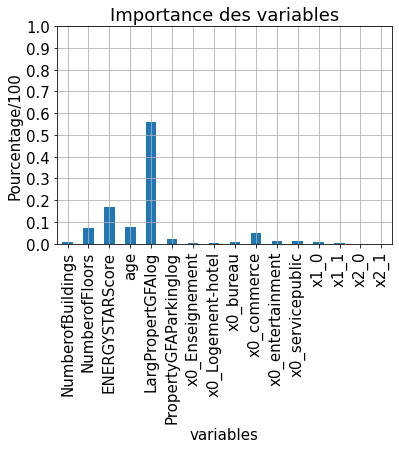

In [836]:
lst_features=grid_GBR_allin.best_estimator_['transf_pipeline'].transformers_[0][-1]+list(grid_GBR_allin.best_estimator_['transf_pipeline'].named_transformers_['cat'].get_feature_names())
tab_imp=grid_GBR_allin.best_estimator_['model'].feature_importances_.reshape(1,-1)
pd.DataFrame(tab_imp,columns=lst_features).T.plot(kind='bar',legend=False)
plt.grid()
plt.yticks(np.arange(0,1.1,0.1))
plt.ylabel('Pourcentage/100')
plt.xlabel('variables')

plt.title('Importance des variables')

In [713]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ['NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore', 'age',
        'LargPropertGFAlog', 
        'PropertyGFAParkinglog']
cat_attribs = ['LargestPropertyUseType','ElecPourcent','SteamPourcent']

transf_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


model=RandomForestRegressor()

full_pipeline = Pipeline([
        ("transf_pipeline",transf_pipeline),
        ("model",model)
    ])


In [714]:
param_grid = {
    'model__bootstrap': [True],
    'model__max_depth': [80, 90, 100, 110,150],
    'model__min_samples_leaf': [3],
    'model__min_samples_split': [12],
    'model__n_estimators': [100,500, 1000,1500]
}

grid_rfall = GridSearchCV(full_pipeline, param_grid = param_grid, cv=3,refit=True)

In [715]:
grid_rfall.fit(Xtr,ytr)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transf_pipeline',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'ENERGYSTARScore',
                                                                          'age',
                                                                          'LargPropertGFAlog',
                                                                          'PropertyGFAParkinglog']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['LargestPropertyUseType',
                                                                          'ElecPourcent',
                                                                          'SteamPourcent'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__bootstrap': [True],
                         'model__max_depth': [80, 90, 100, 110, 150],
                         'model__min_samples_leaf': [3],
                         'model__min_samples_split': [12],
                         'model__n_estimators': [100, 500, 1000, 1500]})

In [716]:
df_res=df_res.append(retour_score(Xtr,ytr,Xtst,ytst,grid_rfall,name='RF_allin'))

In [732]:
df_restime=df_restime.append(pd.DataFrame(pd.DataFrame(grid_rfall.cv_results_)[['mean_fit_time',
                                                               'mean_score_time']].loc[0].values.reshape(1,2),
                                             columns=df_restime.columns,
                  index=['RF_allin']))

Text(0.5, 1.0, 'Importance des variables')

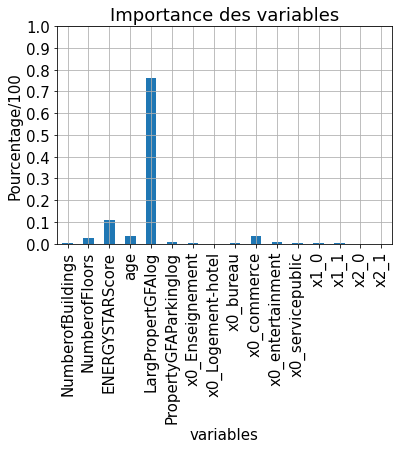

In [837]:
lst_features=grid_rfall.best_estimator_['transf_pipeline'].transformers_[0][-1]+list(grid_rfall.best_estimator_['transf_pipeline'].named_transformers_['cat'].get_feature_names())
tab_imp=grid_rfall.best_estimator_['model'].feature_importances_.reshape(1,-1)
pd.DataFrame(tab_imp,columns=lst_features).T.plot(kind='bar',legend=False)
plt.grid()
plt.yticks(np.arange(0,1.1,0.1))
plt.ylabel('Pourcentage/100')
plt.xlabel('variables')

plt.title('Importance des variables')

In [738]:
df_res.index,df_restime.index

(Index(['Dummyregressor', 'LinearRegression_in_surface', 'Elasticnet_1in_surf',
        'XGB_1in_surf', 'svr_1in_surf', 'RF_1in_surf',
        'LinearReg_2in_surftypes', 'XGB_2in_surftypes', 'RF_2in_surftypes',
        'ElasticNet_2in_surftypes', 'ElasticNet_3in_surftypesage',
        'ElasticNet__3in_surftypesage', 'XGB_3in_surftypesage',
        'RF_3in_surftypesage', 'LinearReg_4in_surftypesageElec',
        'LinearReg_allin', 'ElasticNet_allin', 'XGB_allin', 'RF_allin'],
       dtype='object'),
 Index(['Elasticnet_1in_surf', 'svr_1in_surf', 'XGB_1in_surf', 'RF_1in_surf',
        'Dummyregressor', 'LinearRegression_in_surface', 'XGB_2in_surftypes',
        'RF_2in_surftypes', 'ElasticNet_2in_surftypes',
        'ElasticNet__3in_surftypesage', 'XGB_3in_surftypesage',
        'RF_3in_surftypesage', 'ElasticNet_allin', 'XGB_allin', 'RF_allin'],
       dtype='object'))

In [741]:
set(df_restime.index)-set(df_res.index)

set()

In [742]:
set(df_res.index)-set(df_restime.index)

{'ElasticNet_3in_surftypesage',
 'LinearReg_2in_surftypes',
 'LinearReg_4in_surftypesageElec',
 'LinearReg_allin'}

In [743]:
df_res

,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE
Dummyregressor,-2.220446e-16,0.000000,1.973587,1.906855,0.000000,-0.005362,0.535290,0.553897,0.427786,0.445315
LinearRegression_in_surface,6.305165e-01,0.664082,1.353113,1.211572,0.630516,0.660009,0.325377,0.322108,0.239847,0.230930
Elasticnet_1in_surf,6.305159e-01,0.664006,1.353711,1.211543,0.630516,0.659932,0.325377,0.322144,0.239843,0.230947
XGB_1in_surf,6.514641e-01,0.668951,1.277704,1.175535,0.651454,0.663781,0.316023,0.320316,0.231992,0.230208
svr_1in_surf,6.313484e-01,0.666377,1.338326,1.209909,0.631253,0.660964,0.325053,0.321655,0.239806,0.230917
RF_1in_surf,7.259154e-01,0.609166,1.127674,1.291782,0.725902,0.604579,0.280248,0.347374,0.206333,0.257391
LinearReg_2in_surftypes,6.786090e-01,0.710040,1.327173,1.117444,0.678609,0.706439,0.303463,0.299307,0.214371,0.213342
XGB_2in_surftypes,6.904825e-01,0.709114,1.246763,1.112761,0.690476,0.704225,0.297808,0.300433,0.211746,0.213596
RF_2in_surftypes,7.905983e-01,0.705964,0.974150,1.144866,0.790598,0.702390,0.244951,0.301364,0.171952,0.217386
ElasticNet_2in_surftypes,6.785941e-01,0.709975,1.327141,1.117760,0.678594,0.706365,0.303470,0.299345,0.214368,0.213455


In [746]:
df_res[df_restime.columns]=df_restime

In [747]:
df_res

,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE,Temps_train,Temps_pred
Dummyregressor,-2.220446e-16,0.000000,1.973587,1.906855,0.000000,-0.005362,0.535290,0.553897,0.427786,0.445315,NaN,NaN
LinearRegression_in_surface,6.305165e-01,0.664082,1.353113,1.211572,0.630516,0.660009,0.325377,0.322108,0.239847,0.230930,NaN,NaN
Elasticnet_1in_surf,6.305159e-01,0.664006,1.353711,1.211543,0.630516,0.659932,0.325377,0.322144,0.239843,0.230947,0.005600,0.002095
XGB_1in_surf,6.514641e-01,0.668951,1.277704,1.175535,0.651454,0.663781,0.316023,0.320316,0.231992,0.230208,0.179661,0.002992
svr_1in_surf,6.313484e-01,0.666377,1.338326,1.209909,0.631253,0.660964,0.325053,0.321655,0.239806,0.230917,0.027132,0.010450
RF_1in_surf,7.259154e-01,0.609166,1.127674,1.291782,0.725902,0.604579,0.280248,0.347374,0.206333,0.257391,0.109754,0.011649
LinearReg_2in_surftypes,6.786090e-01,0.710040,1.327173,1.117444,0.678609,0.706439,0.303463,0.299307,0.214371,0.213342,NaN,NaN
XGB_2in_surftypes,6.904825e-01,0.709114,1.246763,1.112761,0.690476,0.704225,0.297808,0.300433,0.211746,0.213596,0.036779,0.004527
RF_2in_surftypes,7.905983e-01,0.705964,0.974150,1.144866,0.790598,0.702390,0.244951,0.301364,0.171952,0.217386,0.144970,0.010281
ElasticNet_2in_surftypes,6.785941e-01,0.709975,1.327141,1.117760,0.678594,0.706365,0.303470,0.299345,0.214368,0.213455,0.008490,0.003798


In [831]:
df_res.iloc[-3:].style.background_gradient(cmap=cm).set_precision(4).highlight_null('yellow').highlight_min(axis=0, color='red').highlight_max(axis=0, color='blue')


,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE,Temps_train,Temps_pred
XGB_allin,0.8642,0.7944,0.7966,0.7850,0.8642,0.7923,0.1972,0.2517,0.1384,0.1740,0.0252,0.0040
RF_allin,0.8800,0.7860,0.9428,0.7467,0.8800,0.7847,0.1855,0.2563,0.1230,0.1813,0.1560,0.0090
XGB_snrj,0.8079,0.7368,0.8526,1.0432,0.8079,0.7317,0.2346,0.2861,0.1701,0.2056,0.0264,0.0044


In [827]:
df_res

,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE,Temps_train,Temps_pred
Dummyregressor,-2.220446e-16,0.000000,1.973587,1.906855,0.000000,-0.005362,0.535290,0.553897,0.427786,0.445315,NaN,NaN
LinearRegression_in_surface,6.305165e-01,0.664082,1.353113,1.211572,0.630516,0.660009,0.325377,0.322108,0.239847,0.230930,NaN,NaN
Elasticnet_1in_surf,6.305159e-01,0.664006,1.353711,1.211543,0.630516,0.659932,0.325377,0.322144,0.239843,0.230947,0.005600,0.002095
XGB_1in_surf,6.514641e-01,0.668951,1.277704,1.175535,0.651454,0.663781,0.316023,0.320316,0.231992,0.230208,0.179661,0.002992
svr_1in_surf,6.313484e-01,0.666377,1.338326,1.209909,0.631253,0.660964,0.325053,0.321655,0.239806,0.230917,0.027132,0.010450
RF_1in_surf,7.259154e-01,0.609166,1.127674,1.291782,0.725902,0.604579,0.280248,0.347374,0.206333,0.257391,0.109754,0.011649
LinearReg_2in_surftypes,6.786090e-01,0.710040,1.327173,1.117444,0.678609,0.706439,0.303463,0.299307,0.214371,0.213342,NaN,NaN
XGB_2in_surftypes,6.904825e-01,0.709114,1.246763,1.112761,0.690476,0.704225,0.297808,0.300433,0.211746,0.213596,0.036779,0.004527
RF_2in_surftypes,7.905983e-01,0.705964,0.974150,1.144866,0.790598,0.702390,0.244951,0.301364,0.171952,0.217386,0.144970,0.010281
ElasticNet_2in_surftypes,6.785941e-01,0.709975,1.327141,1.117760,0.678594,0.706365,0.303470,0.299345,0.214368,0.213455,0.008490,0.003798


In [ ]:
[

In [833]:
df_res.iloc[[1,7,16,17,18]].style.background_gradient(cmap=cm).set_precision(4).highlight_null('gray').highlight_min(axis=0, color='red').highlight_max(axis=0, color='blue')


,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE,Temps_train,Temps_pred
LinearRegression_in_surface,0.6305,0.6641,1.3531,1.2116,0.6305,0.6600,0.3254,0.3221,0.2398,0.2309,nan,nan
XGB_2in_surftypes,0.6905,0.7091,1.2468,1.1128,0.6905,0.7042,0.2978,0.3004,0.2117,0.2136,0.0368,0.0045
ElasticNet_allin,0.7584,0.8021,1.3544,0.9540,0.7584,0.8014,0.2631,0.2462,0.1762,0.1623,0.0076,0.0038
XGB_allin,0.8642,0.7944,0.7966,0.7850,0.8642,0.7923,0.1972,0.2517,0.1384,0.1740,0.0252,0.0040
RF_allin,0.8800,0.7860,0.9428,0.7467,0.8800,0.7847,0.1855,0.2563,0.1230,0.1813,0.1560,0.0090


In [825]:
df_res

,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE,Temps_train,Temps_pred
Dummyregressor,-2.220446e-16,0.000000,1.973587,1.906855,0.000000,-0.005362,0.535290,0.553897,0.427786,0.445315,NaN,NaN
LinearRegression_in_surface,6.305165e-01,0.664082,1.353113,1.211572,0.630516,0.660009,0.325377,0.322108,0.239847,0.230930,NaN,NaN
Elasticnet_1in_surf,6.305159e-01,0.664006,1.353711,1.211543,0.630516,0.659932,0.325377,0.322144,0.239843,0.230947,0.005600,0.002095
XGB_1in_surf,6.514641e-01,0.668951,1.277704,1.175535,0.651454,0.663781,0.316023,0.320316,0.231992,0.230208,0.179661,0.002992
svr_1in_surf,6.313484e-01,0.666377,1.338326,1.209909,0.631253,0.660964,0.325053,0.321655,0.239806,0.230917,0.027132,0.010450
RF_1in_surf,7.259154e-01,0.609166,1.127674,1.291782,0.725902,0.604579,0.280248,0.347374,0.206333,0.257391,0.109754,0.011649
LinearReg_2in_surftypes,6.786090e-01,0.710040,1.327173,1.117444,0.678609,0.706439,0.303463,0.299307,0.214371,0.213342,NaN,NaN
XGB_2in_surftypes,6.904825e-01,0.709114,1.246763,1.112761,0.690476,0.704225,0.297808,0.300433,0.211746,0.213596,0.036779,0.004527
RF_2in_surftypes,7.905983e-01,0.705964,0.974150,1.144866,0.790598,0.702390,0.244951,0.301364,0.171952,0.217386,0.144970,0.010281
ElasticNet_2in_surftypes,6.785941e-01,0.709975,1.327141,1.117760,0.678594,0.706365,0.303470,0.299345,0.214368,0.213455,0.008490,0.003798


In [790]:
Train[['NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore', 'age',
       'LargestPropertyUseType', 
       'LargPropertGFAlog', 'SteamPourcent', 'ElecPourcent',
       'PropertyGFAParkinglog','NRJuselog', 'GHGEemissionlog']].head().reset_index(drop=True)

,NumberofBuildings,NumberofFloors,ENERGYSTARScore,age,LargestPropertyUseType,LargPropertGFAlog,SteamPourcent,ElecPourcent,PropertyGFAParkinglog,NRJuselog,GHGEemissionlog
0,1.0,1.0,89.0,45.5,bureau,4.639646,0,0,0.000000,6.495000,2.026942
1,1.0,2.0,86.0,6.5,Enseignement,5.142095,0,1,0.000000,6.682342,2.087107
2,1.0,3.0,69.0,113.5,bureau,4.305007,0,1,0.000000,5.936042,0.846337
3,1.0,7.0,88.5,15.5,bureau,5.212409,0,1,4.927832,6.924903,1.823213
4,1.0,2.0,83.5,85.5,entertainment,4.406915,0,1,0.000000,5.766064,1.194930


In [792]:
df12[['NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore', 'age',
       'LargestPropertyUseType', 
       'LargPropertGFAlog', 'SteamPourcent', 'ElecPourcent',
       'PropertyGFAParkinglog','NRJuselog', 'GHGEemissionlog']].reset_index(drop=True)

,NumberofBuildings,NumberofFloors,ENERGYSTARScore,age,LargestPropertyUseType,LargPropertGFAlog,SteamPourcent,ElecPourcent,PropertyGFAParkinglog,NRJuselog,GHGEemissionlog
0,1.0,12.0,62.5,88.5,Logement-hotel,4.946624,0,1,0.000000,6.851497,2.399163
1,1.0,11.0,56.0,19.5,Logement-hotel,4.923664,0,0,4.177969,6.922782,2.448219
2,1.0,41.0,30.5,46.5,Logement-hotel,5.879021,0,1,4.992819,7.862482,3.317307
3,1.0,18.0,71.0,35.5,Logement-hotel,5.091477,0,0,4.570905,7.161394,2.705312
4,1.0,11.0,26.0,89.5,Logement-hotel,4.910374,0,0,0.000000,6.778572,2.286232
...,...,...,...,...,...,...,...,...,...,...,...
978,1.0,1.0,72.5,55.5,commerce,4.754998,0,1,0.000000,6.122228,1.570601
979,1.0,2.0,67.0,66.5,Enseignement,4.568213,0,0,0.000000,6.320149,1.935633
980,1.0,2.0,11.0,5.5,bureau,4.412981,0,1,0.000000,6.276445,1.338357
981,1.0,1.0,65.5,63.5,commerce,4.308799,0,1,0.000000,6.154100,1.330008


Index(['NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore', 'age',
       'LargestPropertyUseType', 'NRJuselog', 'GHGEemissionlog',
       'LargPropertGFAlog', 'SteamPourcent', 'ElecPourcent',
       'PropertyGFAParkinglog'],
      dtype='object')

In [820]:
ytr=Train.NRJuselog
Xtr=Train.drop(['NRJuselog','GHGEemissionlog','ENERGYSTARScore'
       ],axis=1)

In [754]:
ytst=Test.NRJuselog
Xtst=Test.drop(['NRJuselog','GHGEemissionlog','ENERGYSTARScore'
       ],axis=1)

In [821]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ['NumberofBuildings', 'NumberofFloors', 'age',
        'LargPropertGFAlog', 
        'PropertyGFAParkinglog']
cat_attribs = ['LargestPropertyUseType','ElecPourcent','SteamPourcent']

transf_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


model=GradientBoostingRegressor()

full_pipeline = Pipeline([
        ("transf_pipeline",transf_pipeline),
        ("model",model)
    ])

parameters = {'model__learning_rate': [0.001,0.01,0.1],
                  'model__subsample'    : [0.2,0.85],
                  'model__n_estimators' : [50,100,500,1000],
                  'model__max_depth'    : [1,4,8],
              
                 }


grid_GBR_snrj = GridSearchCV(full_pipeline, param_grid = parameters, cv=3,refit=True)
grid_GBR_snrj.fit(Xtr, ytr)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transf_pipeline',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'age',
                                                                          'LargPropertGFAlog',
                                                                          'PropertyGFAParkinglog']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['LargestPropertyUseType',
                                                                          'ElecPourcent',
                                                                          'SteamPourcent'])])),
                                       ('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.001, 0.01, 0.1],
                         'model__max_depth': [1, 4, 8],
                         'model__n_estimators': [50, 100, 500, 1000],
                         'model__subsample': [0.2, 0.85]})

In [ ]:
grid

In [757]:
df_res=df_res.append(retour_score(Xtr,ytr,Xtst,ytst,grid_GBR_snrj,name='XGB_snrj'))

In [760]:
df_restime=df_restime.append(pd.DataFrame(pd.DataFrame(grid_GBR_snrj.cv_results_)[['mean_fit_time',
                                                               'mean_score_time']].loc[0].values.reshape(1,2),
                                             columns=df_restime.columns,
                  index=['XGB_snrj']))

Text(0.5, 1.0, 'Importance des variables')

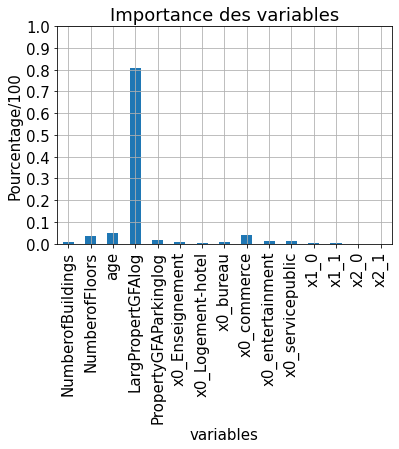

In [838]:
lst_features=grid_GBR_snrj.best_estimator_['transf_pipeline'].transformers_[0][-1]+list(grid_GBR_snrj.best_estimator_['transf_pipeline'].named_transformers_['cat'].get_feature_names())
tab_imp=grid_GBR_snrj.best_estimator_['model'].feature_importances_.reshape(1,-1)
pd.DataFrame(tab_imp,columns=lst_features).T.plot(kind='bar',legend=False)
plt.grid()
plt.yticks(np.arange(0,1.1,0.1))
plt.ylabel('Pourcentage/100')
plt.xlabel('variables')

plt.title('Importance des variables')

In [761]:
df_res[df_restime.columns]=df_restime

In [762]:
df_res

,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE,Temps_train,Temps_pred
Dummyregressor,-2.220446e-16,0.000000,1.973587,1.906855,0.000000,-0.005362,0.535290,0.553897,0.427786,0.445315,NaN,NaN
LinearRegression_in_surface,6.305165e-01,0.664082,1.353113,1.211572,0.630516,0.660009,0.325377,0.322108,0.239847,0.230930,NaN,NaN
Elasticnet_1in_surf,6.305159e-01,0.664006,1.353711,1.211543,0.630516,0.659932,0.325377,0.322144,0.239843,0.230947,0.005600,0.002095
XGB_1in_surf,6.514641e-01,0.668951,1.277704,1.175535,0.651454,0.663781,0.316023,0.320316,0.231992,0.230208,0.179661,0.002992
svr_1in_surf,6.313484e-01,0.666377,1.338326,1.209909,0.631253,0.660964,0.325053,0.321655,0.239806,0.230917,0.027132,0.010450
RF_1in_surf,7.259154e-01,0.609166,1.127674,1.291782,0.725902,0.604579,0.280248,0.347374,0.206333,0.257391,0.109754,0.011649
LinearReg_2in_surftypes,6.786090e-01,0.710040,1.327173,1.117444,0.678609,0.706439,0.303463,0.299307,0.214371,0.213342,NaN,NaN
XGB_2in_surftypes,6.904825e-01,0.709114,1.246763,1.112761,0.690476,0.704225,0.297808,0.300433,0.211746,0.213596,0.036779,0.004527
RF_2in_surftypes,7.905983e-01,0.705964,0.974150,1.144866,0.790598,0.702390,0.244951,0.301364,0.171952,0.217386,0.144970,0.010281
ElasticNet_2in_surftypes,6.785941e-01,0.709975,1.327141,1.117760,0.678594,0.706365,0.303470,0.299345,0.214368,0.213455,0.008490,0.003798


In [764]:
df_res_tot=df_res.loc[['XGB_allin','XGB_snrj']]

In [767]:
df_res_tot.iloc[0]


explained_var     0.864239
test_exp_var      0.794382
error_max         0.796618
test_error_max    0.785031
r2                0.864223
test_r2           0.792325
RMSE              0.197243
test_RMSE         0.251744
MAE               0.138386
test_MAE          0.174001
Temps_train       0.025243
Temps_pred        0.003977
Name: XGB_allin, dtype: float64

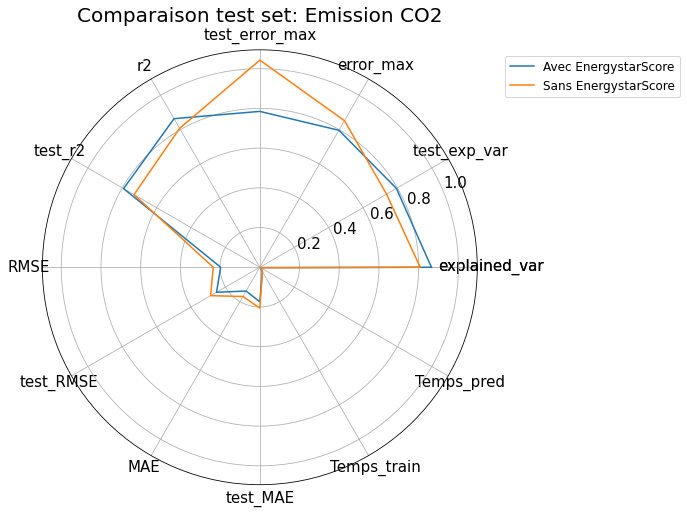

In [780]:

categories=df_res_tot.T.index
categories = [*categories, categories[0]]
dtest=list(df_res_tot.iloc[0].values)
dtrain=list(df_res_tot.iloc[1].values)
dtest = [*dtest, dtest[0]]
dtrain = [*dtrain, dtrain[0]]


label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
plt.figure(figsize=(8,8))

plt.subplot(polar=True)
plt.plot(label_loc, dtest, label='Avec EnergystarScore')
plt.plot(label_loc, dtrain, label='Sans EnergystarScore')
plt.title('Comparaison test set: Emission CO2', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(fontsize=12,bbox_to_anchor=(1.05, 1.0), loc='upper left')



In [781]:
df_res_tot.style.background_gradient(cmap=cm).set_precision(4).highlight_null('red').highlight_min(axis=0, color='red').highlight_max(axis=0, color='blue')


,explained_var,test_exp_var,error_max,test_error_max,r2,test_r2,RMSE,test_RMSE,MAE,test_MAE,Temps_train,Temps_pred
XGB_allin,0.8642,0.7944,0.7966,0.7850,0.8642,0.7923,0.1972,0.2517,0.1384,0.1740,0.0252,0.0040
XGB_snrj,0.8079,0.7368,0.8526,1.0432,0.8079,0.7317,0.2346,0.2861,0.1701,0.2056,0.0264,0.0044
